In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from tools import *

# Import Data

In [2]:
cycles = pd.read_excel("./data/Case study - Samuel LIGONNIERE - M2IMSD Evry.xlsx", sheet_name="CYCLES")
cycles.head()

date    country  rpp_value  cgdp_value   cr_value  spr_value
0  1960-03-31 00:00:00  Argentina        NaN         NaN        NaN        NaN
1  1960-06-30 00:00:00  Argentina        NaN         NaN        NaN        NaN
2  1960-09-30 00:00:00  Argentina        NaN         NaN        NaN        NaN
3            31dec1960  Argentina        NaN         NaN  56.659502        NaN
4  1961-03-31 00:00:00  Argentina        NaN         NaN  57.354587        NaN

In [3]:
cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15872 entries, 0 to 15871
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        15872 non-null  object 
 1   country     15872 non-null  object 
 2   rpp_value   7780 non-null   float64
 3   cgdp_value  8783 non-null   float64
 4   cr_value    8824 non-null   float64
 5   spr_value   8076 non-null   float64
dtypes: float64(4), object(2)
memory usage: 744.1+ KB


In [4]:
determinants = pd.read_excel("./data/Case study - Samuel LIGONNIERE - M2IMSD Evry.xlsx", sheet_name="DETERMINANTS")
determinants.head()

code  year  ka_open  cblackmarketexchangerates  difinancialopenness  \
0  ARE  1960      NaN                        NaN                  NaN   
1  ARE  1961      NaN                        NaN                  NaN   
2  ARE  1962      NaN                        NaN                  NaN   
3  ARE  1963      NaN                        NaN                  NaN   
4  ARE  1964      NaN                        NaN                  NaN   

   diicapitalcontrols  diiifreedomofforeignerstov  \
0                 NaN                         NaN   
1                 NaN                         NaN   
2                 NaN                         NaN   
3                 NaN                         NaN   
4                 NaN                         NaN   

   divprotectionofforeignasset  dcontrolsofthemovementof  aiownershipofbanks  \
0                          NaN                       NaN                 NaN   
1                          NaN                       NaN                 NaN   
2                          NaN                       NaN                 NaN   
3                          NaN                       NaN                 NaN   
4                          NaN                       NaN                 NaN   

   ...  GDPpercapitacurrentLCU  GDPpercapitaconstantLCU  \
0  ...                     NaN                      NaN   
1  ...                     NaN                      NaN   
2  ...                     NaN                      NaN   
3  ...                     NaN                      NaN   
4  ...                     NaN                      NaN   

   GDPpercapitaconstant2015US  GDPgrowthannual  GDPcurrentUS  GDPcurrentLCU  \
0                         NaN              NaN           NaN            NaN   
1                         NaN              NaN           NaN            NaN   
2                         NaN              NaN           NaN            NaN   
3                         NaN              NaN           NaN            NaN   
4                         NaN              NaN           NaN            NaN   

   GDPconstantLCU  GDPconstant2015US  Centralgovernmentdebttotal  \
0             NaN                NaN                         NaN   
1             NaN                NaN                         NaN   
2             NaN                NaN                         NaN   
3             NaN                NaN                         NaN   
4             NaN                NaN                         NaN   

   PublicDebtShare  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 60 columns]

In [5]:
determinants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4033 entries, 0 to 4032
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         4033 non-null   object 
 1   year                         4033 non-null   int64  
 2   ka_open                      2873 non-null   float64
 3   cblackmarketexchangerates    3013 non-null   float64
 4   difinancialopenness          2777 non-null   float64
 5   diicapitalcontrols           3058 non-null   float64
 6   diiifreedomofforeignerstov   1066 non-null   float64
 7   divprotectionofforeignasset  1670 non-null   float64
 8   dcontrolsofthemovementof     3106 non-null   float64
 9   aiownershipofbanks           2918 non-null   float64
 10  aiiprivatesectorcredit       2788 non-null   float64
 11  aiiiinterestratecontrolsne   2609 non-null   float64
 12  acreditmarketregulation      3018 non-null   float64
 13  Marketcapitspecifi

In [6]:
descriptions_financial = pd.read_excel("./data/Case study - Samuel LIGONNIERE - M2IMSD Evry.xlsx", sheet_name="READ ME", skiprows=2, nrows=73)

In [7]:
descriptions_monetary = pd.read_excel("./data/Case study - Samuel LIGONNIERE - M2IMSD Evry.xlsx", sheet_name="READ ME", skiprows=78, nrows=79)

In [8]:
descriptions_real_economy = pd.read_excel("./data/Case study - Samuel LIGONNIERE - M2IMSD Evry.xlsx", sheet_name="READ ME", skiprows=159, nrows=16)
descriptions_real_economy = descriptions_real_economy.drop(0)

In [9]:
descriptions_inequality = pd.read_excel("./data/Case study - Samuel LIGONNIERE - M2IMSD Evry.xlsx", sheet_name="READ ME", skiprows=177, nrows=13)

In [10]:
descriptions_cycles = pd.read_excel("./data/Case study - Samuel LIGONNIERE - M2IMSD Evry.xlsx", sheet_name="READ ME", skiprows=192, nrows=6)
descriptions_cycles = descriptions_cycles.drop(0)

In [11]:
all_descriptions = pd.concat([descriptions_financial, descriptions_monetary, descriptions_real_economy, descriptions_inequality, descriptions_cycles])
all_descriptions.set_index('Variable', inplace=True)
all_descriptions.index = all_descriptions.index.str.strip()
print(all_descriptions.head())

                                                                 Description
Variable                                                                    
kaopen                     The Chinn-Ito index (KAOPEN) is an index measu...
ka_open                    The Chinn-Ito index (KAOPEN) is an index measu...
cblackmarketexchangerates  This component is based on the percentage diff...
difinancialopenness        This sub-component is based on two sources. (a...
diicapitalcontrols         With this sub-component, the International Mon...


In [12]:
# Describe variable
v_to_describe = ["FID", "PrivateCredit_GDP", "Bankspread"]
for v in v_to_describe:
  search_description(all_descriptions, v)

FID: Financial institutions depth. Source: IMF Financial Structure
PrivateCredit_GDP: Private credit by deposit money banks and other institutions to GDP (%) Source: World Bank
Bankspread: Bank concentration (%) Source: World Bank


# Modélisation

## Réflexion

### Variables dépendantes

Variable dépendante à choisir ?  
GDP : Plusieurs indicateurs dans le excel -- Lequel(s) prendre ?  

- GDPconstant2015US
- GDPpercapitaconstant2015US  

In [13]:
variable_to_describe = ['GDPconstant2015US', 'GDPpercapitaconstant2015US']
for v in variable_to_describe:
  search_description(all_descriptions, v)

GDPconstant2015US: GDP, constant 2015 dollars. Source: World Bank
GDPpercapitaconstant2015US: GDP per capita, constant 2015 dollars. Source: World Bank


Pour la suite, nous choisissons de prendre le GDPconstant2015US comme variable dépendante.  
Nous réaliserons une analyse avec l'autre variable si besoin.

In [14]:
target1 = variable_to_describe[0]
target2 = variable_to_describe[1]

In [15]:
numeric_columns, categorical_columns = split_columns_by_type(determinants)
if 'year' in numeric_columns:
  numeric_columns.remove('year')

print(numeric_columns)
print(categorical_columns)

numeric_columns = ['year', 'ka_open', 'cblackmarketexchangerates', 'difinancialopenness', 'diicapitalcontrols', 'diiifreedomofforeignerstov', 'divprotectionofforeignasset', 'dcontrolsofthemovementof', 'aiownershipofbanks', 'aiiprivatesectorcredit', 'aiiiinterestratecontrolsne', 'acreditmarketregulation', 'Marketcapitspecific', 'Corporatebondsshare', 'BankCredit_GDP', 'BankAssets_GDP', 'NonBankAssets_GDP', 'BankAssets_CBShare', 'LiquidLiabilities_GDP', 'AllDeposits_GDP', 'PrivateCredit_GDP', 'StockCapitalization_GDP', 'Stocktraded_GDP', 'Bankmargin', 'Bankspread', 'Zscore', 'NPL', 'BankConcentration', 'BankDeposits_GDP', 'FD', 'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME', 'Portfolioequityassets', 'Portfolioequityliabilities', 'FDIassets', 'FDIliabilities', 'GDPUS', 'Currentaccountbalance', 'Capitalaccount', 'cbie_index', 'GDPpercapitagrowthannual', 'GDPpercapitacurrentUS', 'GDPpercapitacurrentLCU', 'GDPpercapitaconstantLCU', 'GDPpercapitaconstant2015US', 'GDPgrowthannual', 'GDPc

In [16]:
determinants_num = determinants.copy()
determinants_num = drop_cols_from_dataframe(determinants_num, categorical_columns + ['year'])
determinants_num.columns = determinants_num.columns.str.strip()
years = determinants['year']

Index(['ka_open', 'cblackmarketexchangerates', 'difinancialopenness',
       'diicapitalcontrols', 'diiifreedomofforeignerstov',
       'divprotectionofforeignasset', 'dcontrolsofthemovementof',
       'aiownershipofbanks', 'aiiprivatesectorcredit',
       'aiiiinterestratecontrolsne', 'acreditmarketregulation',
       'Marketcapitspecific', 'Corporatebondsshare', 'BankCredit_GDP',
       'BankAssets_GDP', 'NonBankAssets_GDP', 'BankAssets_CBShare',
       'LiquidLiabilities_GDP', 'AllDeposits_GDP', 'PrivateCredit_GDP',
       'StockCapitalization_GDP', 'Stocktraded_GDP', 'Bankmargin',
       'Bankspread', 'Zscore', 'NPL', 'BankConcentration', 'BankDeposits_GDP',
       'FD', 'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME',
       'Portfolioequityassets', 'Portfolioequityliabilities', 'FDIassets',
       'FDIliabilities', 'GDPUS', 'Currentaccountbalance', 'Capitalaccount',
       'cbie_index', 'GDPpercapitagrowthannual', 'GDPpercapitacurrentUS',
       'GDPpercapitacurrentLCU', 'GD

On supprime toutes les colonnes qui sont des composantes direct du target (tout ceux commençant par GDP).

In [ ]:
col_to_drop = [s for s in determinants_num.columns if s.startswith("GDP") and s != target1] 
determinants_num = drop_cols_from_dataframe(determinants_num, col_to_drop)

Index(['ka_open', 'cblackmarketexchangerates', 'difinancialopenness',
       'diicapitalcontrols', 'diiifreedomofforeignerstov',
       'divprotectionofforeignasset', 'dcontrolsofthemovementof',
       'aiownershipofbanks', 'aiiprivatesectorcredit',
       'aiiiinterestratecontrolsne', 'acreditmarketregulation',
       'Marketcapitspecific', 'Corporatebondsshare', 'BankCredit_GDP',
       'BankAssets_GDP', 'NonBankAssets_GDP', 'BankAssets_CBShare',
       'LiquidLiabilities_GDP', 'AllDeposits_GDP', 'PrivateCredit_GDP',
       'StockCapitalization_GDP', 'Stocktraded_GDP', 'Bankmargin',
       'Bankspread', 'Zscore', 'NPL', 'BankConcentration', 'BankDeposits_GDP',
       'FD', 'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME',
       'Portfolioequityassets', 'Portfolioequityliabilities', 'FDIassets',
       'FDIliabilities', 'Currentaccountbalance', 'Capitalaccount',
       'cbie_index', 'GDPconstant2015US', 'Centralgovernmentdebttotal',
       'PublicDebtShare'],
      dtype='object'

On supprime également toutes les variables qui sont un ratio du GDP car ce sont des variables calculés à partir de la variable dépendante elle-même.

In [18]:
col_to_drop = determinants_num.columns[determinants_num.columns.str.endswith('_GDP')]
determinants_num = drop_cols_from_dataframe(determinants_num, col_to_drop)

Index(['ka_open', 'cblackmarketexchangerates', 'difinancialopenness',
       'diicapitalcontrols', 'diiifreedomofforeignerstov',
       'divprotectionofforeignasset', 'dcontrolsofthemovementof',
       'aiownershipofbanks', 'aiiprivatesectorcredit',
       'aiiiinterestratecontrolsne', 'acreditmarketregulation',
       'Marketcapitspecific', 'Corporatebondsshare', 'BankAssets_CBShare',
       'Bankmargin', 'Bankspread', 'Zscore', 'NPL', 'BankConcentration', 'FD',
       'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME',
       'Portfolioequityassets', 'Portfolioequityliabilities', 'FDIassets',
       'FDIliabilities', 'Currentaccountbalance', 'Capitalaccount',
       'cbie_index', 'GDPconstant2015US', 'Centralgovernmentdebttotal',
       'PublicDebtShare'],
      dtype='object')


In [19]:
determinants_num = drop_cols_from_dataframe(determinants_num, ['PublicDebtShare'])

Index(['ka_open', 'cblackmarketexchangerates', 'difinancialopenness',
       'diicapitalcontrols', 'diiifreedomofforeignerstov',
       'divprotectionofforeignasset', 'dcontrolsofthemovementof',
       'aiownershipofbanks', 'aiiprivatesectorcredit',
       'aiiiinterestratecontrolsne', 'acreditmarketregulation',
       'Marketcapitspecific', 'Corporatebondsshare', 'BankAssets_CBShare',
       'Bankmargin', 'Bankspread', 'Zscore', 'NPL', 'BankConcentration', 'FD',
       'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME',
       'Portfolioequityassets', 'Portfolioequityliabilities', 'FDIassets',
       'FDIliabilities', 'Currentaccountbalance', 'Capitalaccount',
       'cbie_index', 'GDPconstant2015US', 'Centralgovernmentdebttotal'],
      dtype='object')


## NaN values

Enlever toutes les colonnes dont le compte de valeurs NaN sont supérieurs à un certain seuil (> 50%). 

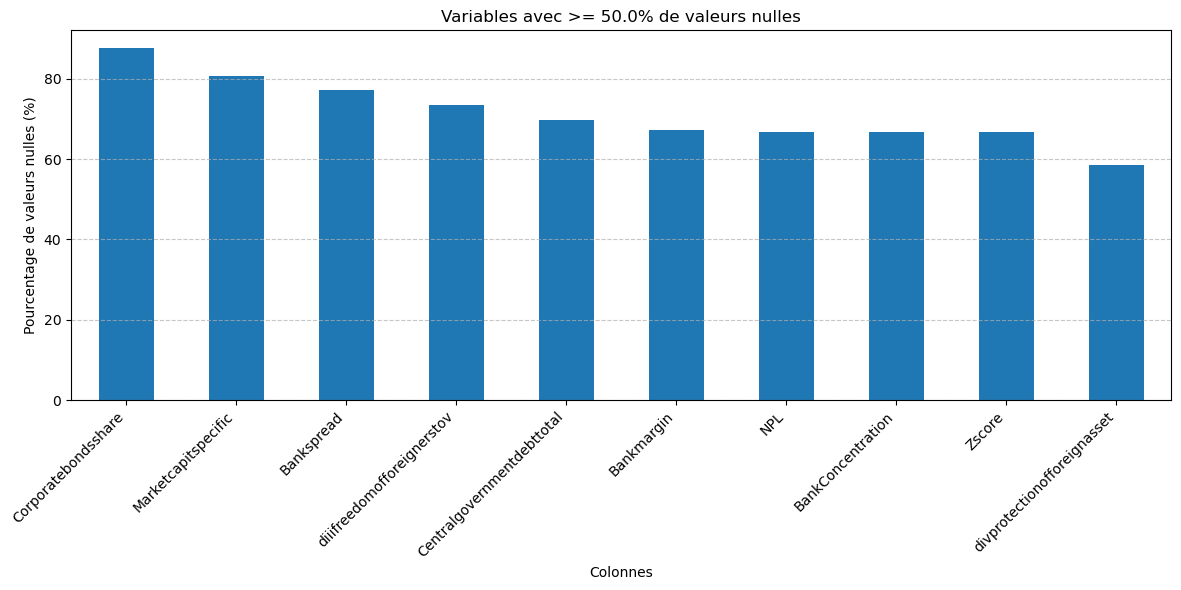

diiifreedomofforeignerstov     73.568063
divprotectionofforeignasset    58.591619
Marketcapitspecific            80.634763
Corporatebondsshare            87.676667
Bankmargin                     67.220431
Bankspread                     77.287379
Zscore                         66.650136
NPL                            66.724523
BankConcentration              66.674932
Centralgovernmentdebttotal     69.774362
dtype: float64


In [20]:
nan_values = get_nan_values_sup_ratio(determinants_num)

Toutes ces colonnes ont des valeurs NaN à hauteur de plus de 50%. Mais serait-ce à cause de certains pays ?  
Si c'est pas le cas, chaque pays devrait avoir 50% de valeurs NaN pour ces catégories :

In [21]:
origin_tab_ref = set(nan_values.index.values)
tab_ref= origin_tab_ref.copy()

for c in determinants['country'].unique():
  determinants_per_country = determinants[determinants['country'] == c]
  num_col, cat_col = split_columns_by_type(determinants_per_country, verbose=False)
  determinants_num_per_country = determinants_per_country[num_col]
  
  nan_val_per_country = get_nan_values_sup_ratio(determinants_num, to_display=False)
  tab_ref = tab_ref & set(nan_val_per_country.index.values)

# Convertir en ensembles pour faciliter la différence
diff1 = origin_tab_ref - tab_ref  # Éléments dans tab1 mais pas dans tab2
diff2 = origin_tab_ref - tab_ref  # Éléments dans tab2 mais pas dans tab1

# Afficher les différences
print(f"Éléments dans tab1 mais pas dans tab2 : {diff1}")
print(f"Éléments dans tab2 mais pas dans tab1 : {diff2}")

Éléments dans tab1 mais pas dans tab2 : set()
Éléments dans tab2 mais pas dans tab1 : set()


Toutes ces variables sont bien uniformément absent quelqu'en soit le pays.  
Nous les supprimons.

In [22]:
drop_cols_from_dataframe(determinants_num, nan_values.index.values)

Index(['ka_open', 'cblackmarketexchangerates', 'difinancialopenness',
       'diicapitalcontrols', 'dcontrolsofthemovementof', 'aiownershipofbanks',
       'aiiprivatesectorcredit', 'aiiiinterestratecontrolsne',
       'acreditmarketregulation', 'BankAssets_CBShare', 'FD', 'FI', 'FM',
       'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME', 'Portfolioequityassets',
       'Portfolioequityliabilities', 'FDIassets', 'FDIliabilities',
       'Currentaccountbalance', 'Capitalaccount', 'cbie_index',
       'GDPconstant2015US'],
      dtype='object')


ka_open  cblackmarketexchangerates  difinancialopenness  \
0          NaN                        NaN                  NaN   
1          NaN                        NaN                  NaN   
2          NaN                        NaN                  NaN   
3          NaN                        NaN                  NaN   
4          NaN                        NaN                  NaN   
...        ...                        ...                  ...   
4028  0.162948                       10.0             3.321726   
4029  0.162948                       10.0             3.317509   
4030  0.162948                       10.0             3.612222   
4031       NaN                        NaN                  NaN   
4032       NaN                        NaN                  NaN   

      diicapitalcontrols  dcontrolsofthemovementof  aiownershipofbanks  \
0                    NaN                       NaN                 NaN   
1                    NaN                       NaN                 NaN   
2                    NaN                       NaN                 NaN   
3                    NaN                       NaN                 NaN   
4                    NaN                       NaN                 NaN   
...                  ...                       ...                 ...   
4028            0.769231                  4.867106                10.0   
4029            0.769231                  2.708851                10.0   
4030            0.769231                  2.782530                10.0   
4031                 NaN                       NaN                 NaN   
4032                 NaN                       NaN                 NaN   

      aiiprivatesectorcredit  aiiiinterestratecontrolsne  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         NaN   
...                      ...                         ...   
4028                6.474332                        10.0   
4029                2.627526                        10.0   
4030                2.627526                        10.0   
4031                     NaN                         NaN   
4032                     NaN                         NaN   

      acreditmarketregulation  BankAssets_CBShare  ...       FMA       FME  \
0                         NaN                 NaN  ...       NaN       NaN   
1                         NaN                 NaN  ...       NaN       NaN   
2                         NaN                 NaN  ...       NaN       NaN   
3                         NaN                 NaN  ...       NaN       NaN   
4                         NaN                 NaN  ...       NaN       NaN   
...                       ...                 ...  ...       ...       ...   
4028                 8.824777               99.03  ...  0.402925  0.408981   
4029                 7.542509               98.61  ...  0.383886  0.344924   
4030                 7.542509               98.98  ...  0.401212  0.344924   
4031                      NaN                 NaN  ...       NaN       NaN   
4032                      NaN                 NaN  ...       NaN       NaN   

      Portfolioequityassets  Portfolioequityliabilities  FDIassets  \
0                       NaN                         NaN        NaN   
1                       NaN                         NaN        NaN   
2                       NaN                         NaN        NaN   
3                       NaN                         NaN        NaN   
4                       NaN                         NaN        NaN   
...                     ...                         ...        ...   
4028              169688.36                   157033.59  214998.06   
4029              168585.03                   143501.53  250963.57   
4030              208591.95          

## Analyse multicolinéarité

Affichons la matrice de corrélation initiale et utilisons la pour comparer avec le processus finale de suppression des variables explicatives corrélés.

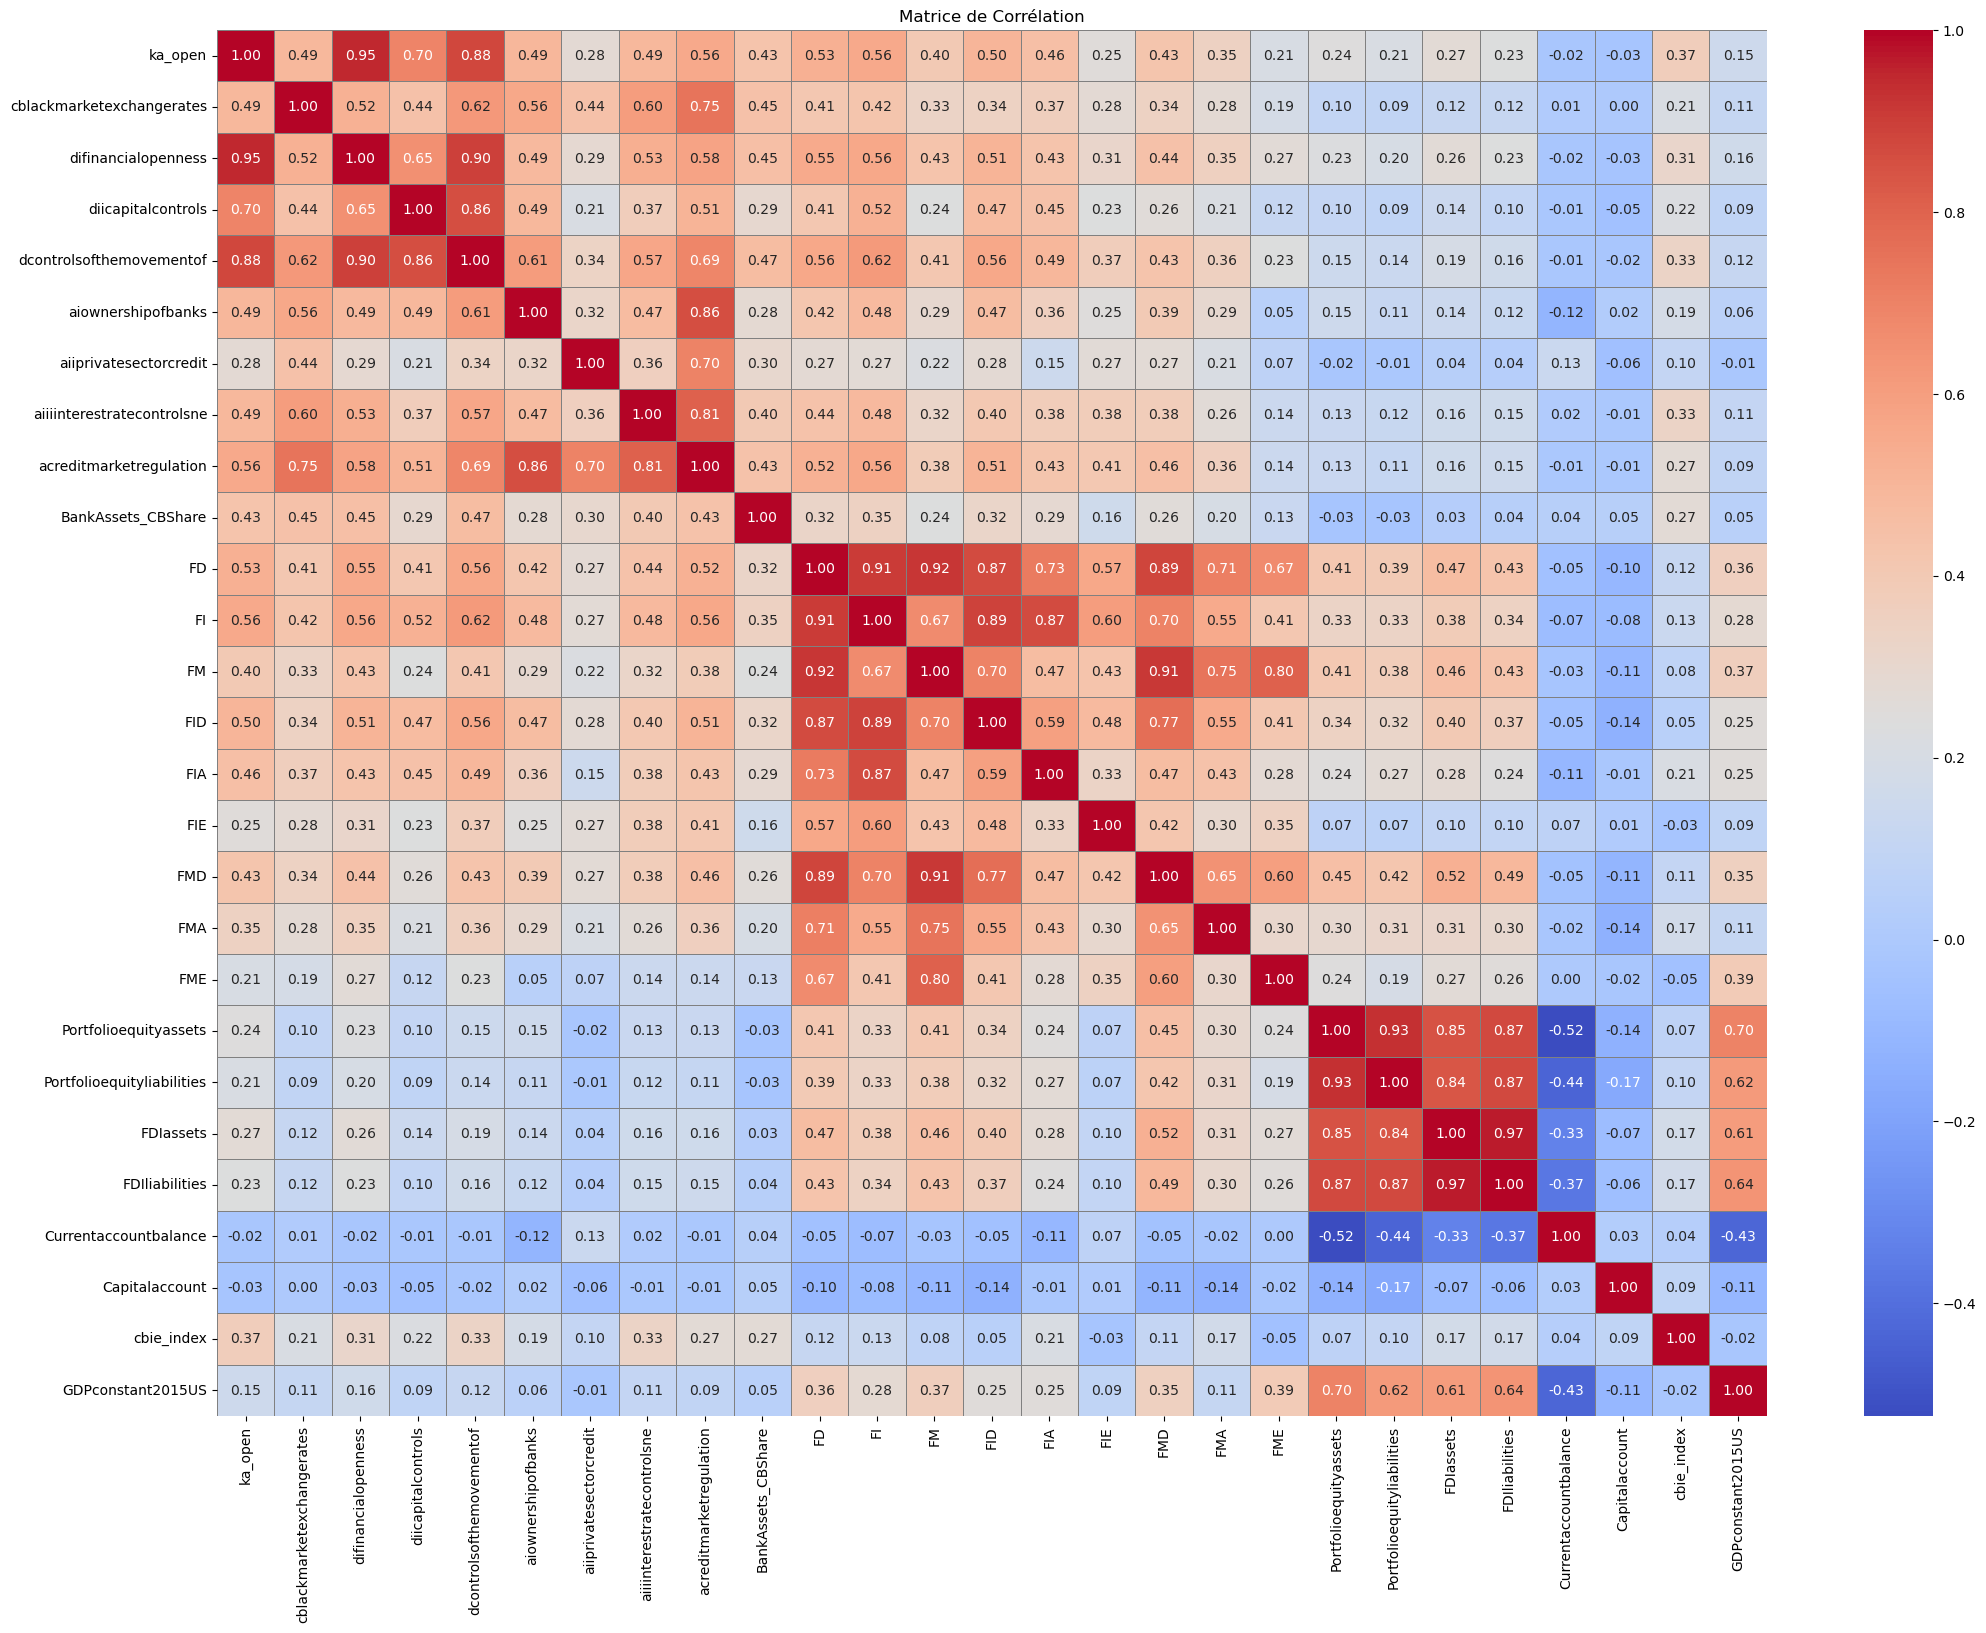

In [23]:
plot_corr(determinants_num)

In [24]:
calculate_vif(determinants_num)

c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([target], axis=1, inplace=True)


Variable           VIF
0                      ka_open  5.976265e+01
1    cblackmarketexchangerates  8.892818e+01
2          difinancialopenness  8.286392e+01
3           diicapitalcontrols  1.588710e+01
4     dcontrolsofthemovementof  8.729292e+01
5           aiownershipofbanks  1.251608e+04
6       aiiprivatesectorcredit  1.476449e+04
7   aiiiinterestratecontrolsne  1.760400e+04
8      acreditmarketregulation  1.288876e+05
9           BankAssets_CBShare  9.047986e+01
10                          FD  2.144571e+14
11                          FI  2.434378e+14
12                          FM  1.668000e+14
13                         FID  3.182756e+13
14                         FIA  4.039103e+13
15                         FIE  1.674201e+13
16                         FMD  2.408342e+13
17                         FMA  1.614193e+13
18                         FME  2.721208e+13
19       Portfolioequityassets  1.327190e+01
20  Portfolioequityliabilities  1.129912e+01
21                   FDIassets  2.171907e+01
22              FDIliabilities  2.257585e+01
23       Currentaccountbalance  1.654209e+00
24              Capitalaccount  1.194377e+00
25                  cbie_index  1.899241e+01

On voit que beaucoup de variables explicatives sont corrélés entre-elles et que le vif moyen de chaque variable est extrèmement haut.  
Il semblerait qu'il y ait donc beaucoup de colinéarité dans notre dataset. Il va falloir faire une sélection de variables.

### Iterative correlation search

Voici notre processus pour identifier et supprimer les variables colinéaires :
- Afficher la matrice de corrélation + VIF moyen de toutes les variables
  - Si il y a des paires de variables explicatives fortement corrélées (>= 80%) ET
  - Le VIF moyen de toutes les variables explicatives >= 10%
  - ALORS on continue la recherche
- Test de significativé des variables exp. avec le target et regarder le R² du modèle
  - Test entre target ~ var1
  - Test entre target ~ var2
  - Test entre target ~ var1 et var2
  - Test entre target ~ toutes les var. avec var1 seul
  - Test entre target ~ toutes les var. avec var2 seul
  - Test entre target ~ toutes les var. sans var1 et var2
- Suppression de la variable (parmi la paire) qui est **le moins significatif** ou qui est une composante de l'autre (dans sa définition).

In [25]:
determinants_num_uncorr = determinants_num.copy()

In [26]:
# determinants_num_uncorr = determinants_num.copy()

# col_to_drop = [
#   # "GDPpercapitagrowthannual","GDPpercapitacurrentUS","GDPpercapitacurrentLCU","GDPpercapitaconstantLCU",
#   # "GDPpercapitaconstant2015US","GDPgrowthannual","GDPcurrentUS","GDPcurrentLCU","GDPconstantLCU",
#   # "GDPUS", 
  
  
#   # "aiownershipofbanks",
  
#   "Zscore", "Bankspread", "Bankmargin", "Corporatebondsshare", "diiifreedomofforeignerstov", # PAs assez de données
#   "Centralgovernmentdebttotal", # PAs assez de données
#   "ka_open",
#   "FM", "FD", "FID", "FI", "FMA", "FMD", "FIE",
#   'BankDeposits_GDP', "BankCredit_GDP", "PrivateCredit_GDP", "BankAssets_GDP",
#   "aiiiinterestratecontrolsne", "cblackmarketexchangerates", "acreditmarketregulation", "aiownershipofbanks",
#   "FDIassets", "FDIliabilities",
#   "StockCapitalization_GDP",
#   "difinancialopenness", "Portfolioequityassets", "dcontrolsofthemovementof",
#   "LiquidLiabilities_GDP", "NonBankAssets_GDP",
#   "Marketcapitspecific", "divprotectionofforeignasset",
#   "BankAssets_CBShare",
#   "BankConcentration",
#   # Peut être
#   "cbie_index", 
#   "FIA", "aiiprivatesectorcredit", "Stocktraded_GDP", "NPL",
#   "diicapitalcontrols",
# ]

# determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, col_to_drop)

In [27]:
find_highly_correlated(determinants_num_uncorr, 0.80)

[('FDIassets', 'FDIliabilities', np.float64(0.9654396354671974)),
 ('difinancialopenness', 'ka_open', np.float64(0.9482253631885516)),
 ('Portfolioequityassets',
  'Portfolioequityliabilities',
  np.float64(0.9307338362754454)),
 ('FD', 'FM', np.float64(0.9174788550801883)),
 ('FM', 'FMD', np.float64(0.9139197886034179)),
 ('FD', 'FI', np.float64(0.9098247225935019)),
 ('dcontrolsofthemovementof',
  'difinancialopenness',
  np.float64(0.8981174220759917)),
 ('FI', 'FID', np.float64(0.8920817689172053)),
 ('FD', 'FMD', np.float64(0.88587848817882)),
 ('dcontrolsofthemovementof', 'ka_open', np.float64(0.8757368672807814)),
 ('FDIliabilities',
  'Portfolioequityliabilities',
  np.float64(0.8706020080509962)),
 ('FDIliabilities', 'Portfolioequityassets', np.float64(0.8693848282606017)),
 ('FD', 'FID', np.float64(0.8672655533738808)),
 ('FI', 'FIA', np.float64(0.8655890366810234)),
 ('dcontrolsofthemovementof',
  'diicapitalcontrols',
  np.float64(0.8615806106391223)),
 ('acreditmarketregul

#### Indicateur d'ouverture financière et de libéralisation (d-...)

In [28]:
var_to_check = [s for s in determinants_num_uncorr.columns if s.startswith("d")] 

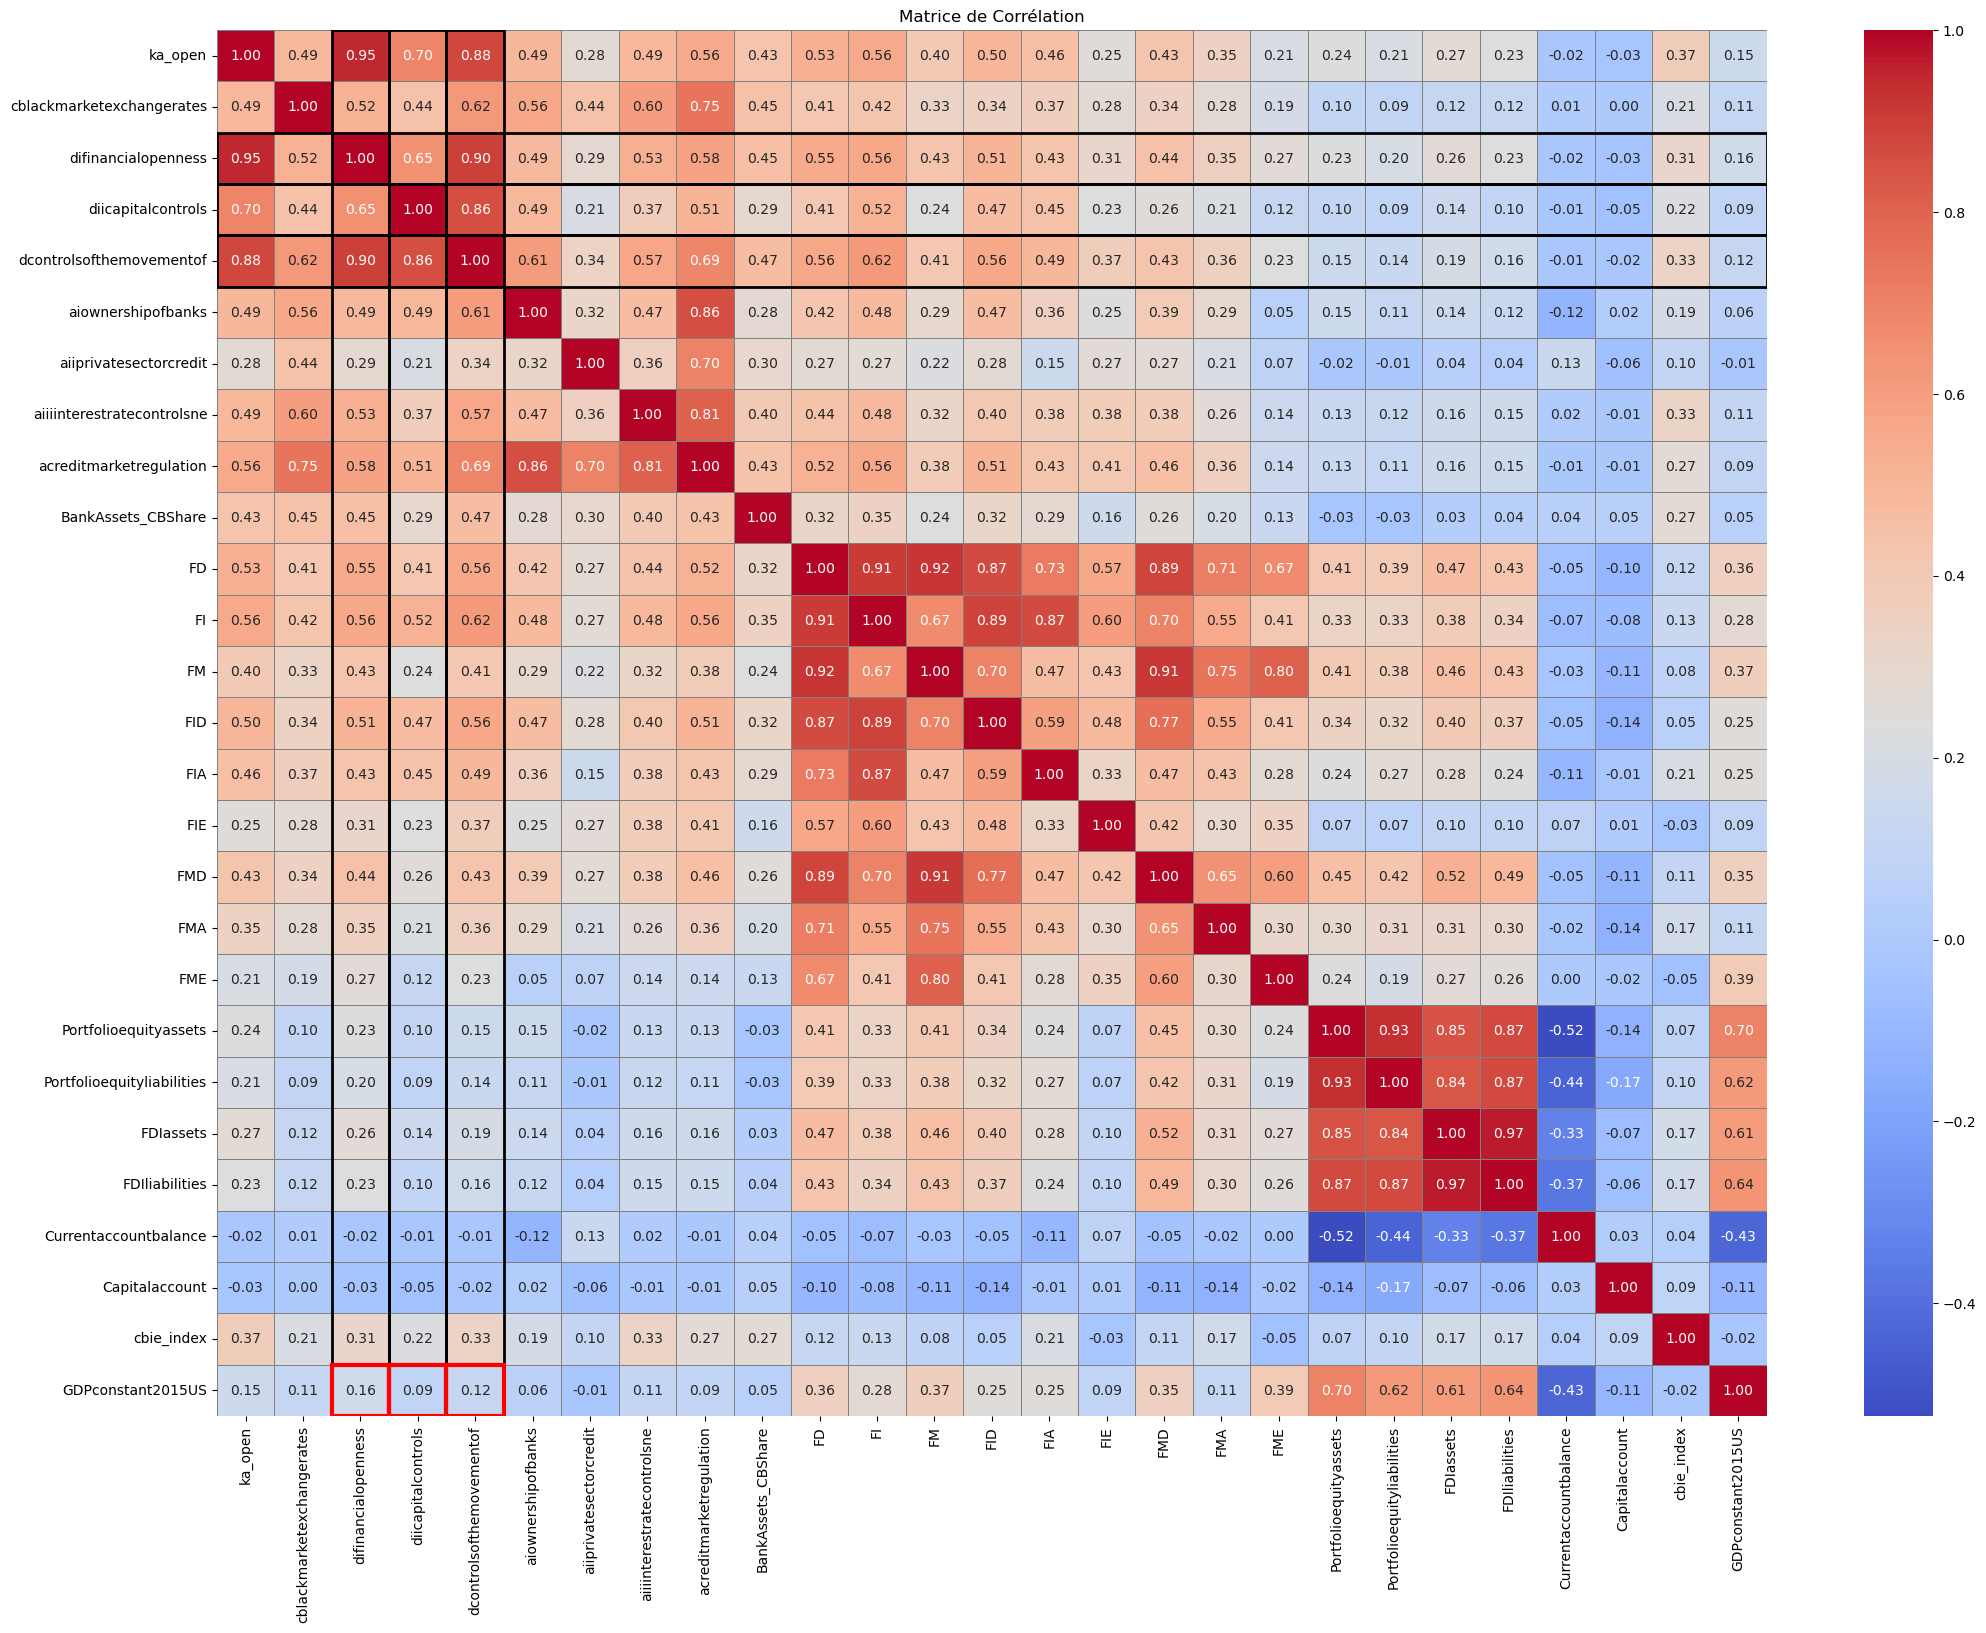

In [29]:
plot_corr(determinants_num_uncorr, var_to_check, target1)

In [30]:
calculate_vif(determinants_num_uncorr, var_to_check)

c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([target], axis=1, inplace=True)


Variable        VIF
0       difinancialopenness  26.518424
1        diicapitalcontrols  10.236186
2  dcontrolsofthemovementof  44.753972

In [31]:
for v in var_to_check:
  search_description(all_descriptions, v)

difinancialopenness: This sub-component is based on two sources. (a) The first source is the Chinn-Ito Index of de jure financial openness. This index is composed of a series of dummy variables that “codify the tabulation of restrictions on cross-border financial transactions reported in the IMF’s Annual Report on Exchange Arrangements and Exchange Restrictions.” This data source scores on a continuous scale from 0-to-1, so it is multiplied by 10 to place it on the 0-to-10 scale. (b) The second source is the “Capital account liberalization” indicator from the Economist Intelligence Unit.
diicapitalcontrols: With this sub-component, the International Monetary Fund reports on up to 13 types of international capital controls. The zero-to-10 rating is the percentage of capital controls not levied as a share of the total number of capital controls listed, multiplied by 10.
dcontrolsofthemovementof: Summary index with (i) financial openness, (ii) capital controls, (iii) freedom of foreigners

On voit que ces 3 variables sont très corrélés entre-elles et ont un VIF très élevé.  
De plus quand on regarde la définition de la variable 'dcontrolsofthemovementof', on voit qu'en réalité, cette variable est un index représentant les 2 autres variables (entre autres) 'difinancialopenness' et 'diicapitalcontrols'.  
On va donc **supprimer ces 2 dernières variables**.

In [32]:
determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, var_to_check[:2])

Index(['ka_open', 'cblackmarketexchangerates', 'dcontrolsofthemovementof',
       'aiownershipofbanks', 'aiiprivatesectorcredit',
       'aiiiinterestratecontrolsne', 'acreditmarketregulation',
       'BankAssets_CBShare', 'FD', 'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD',
       'FMA', 'FME', 'Portfolioequityassets', 'Portfolioequityliabilities',
       'FDIassets', 'FDIliabilities', 'Currentaccountbalance',
       'Capitalaccount', 'cbie_index', 'GDPconstant2015US'],
      dtype='object')


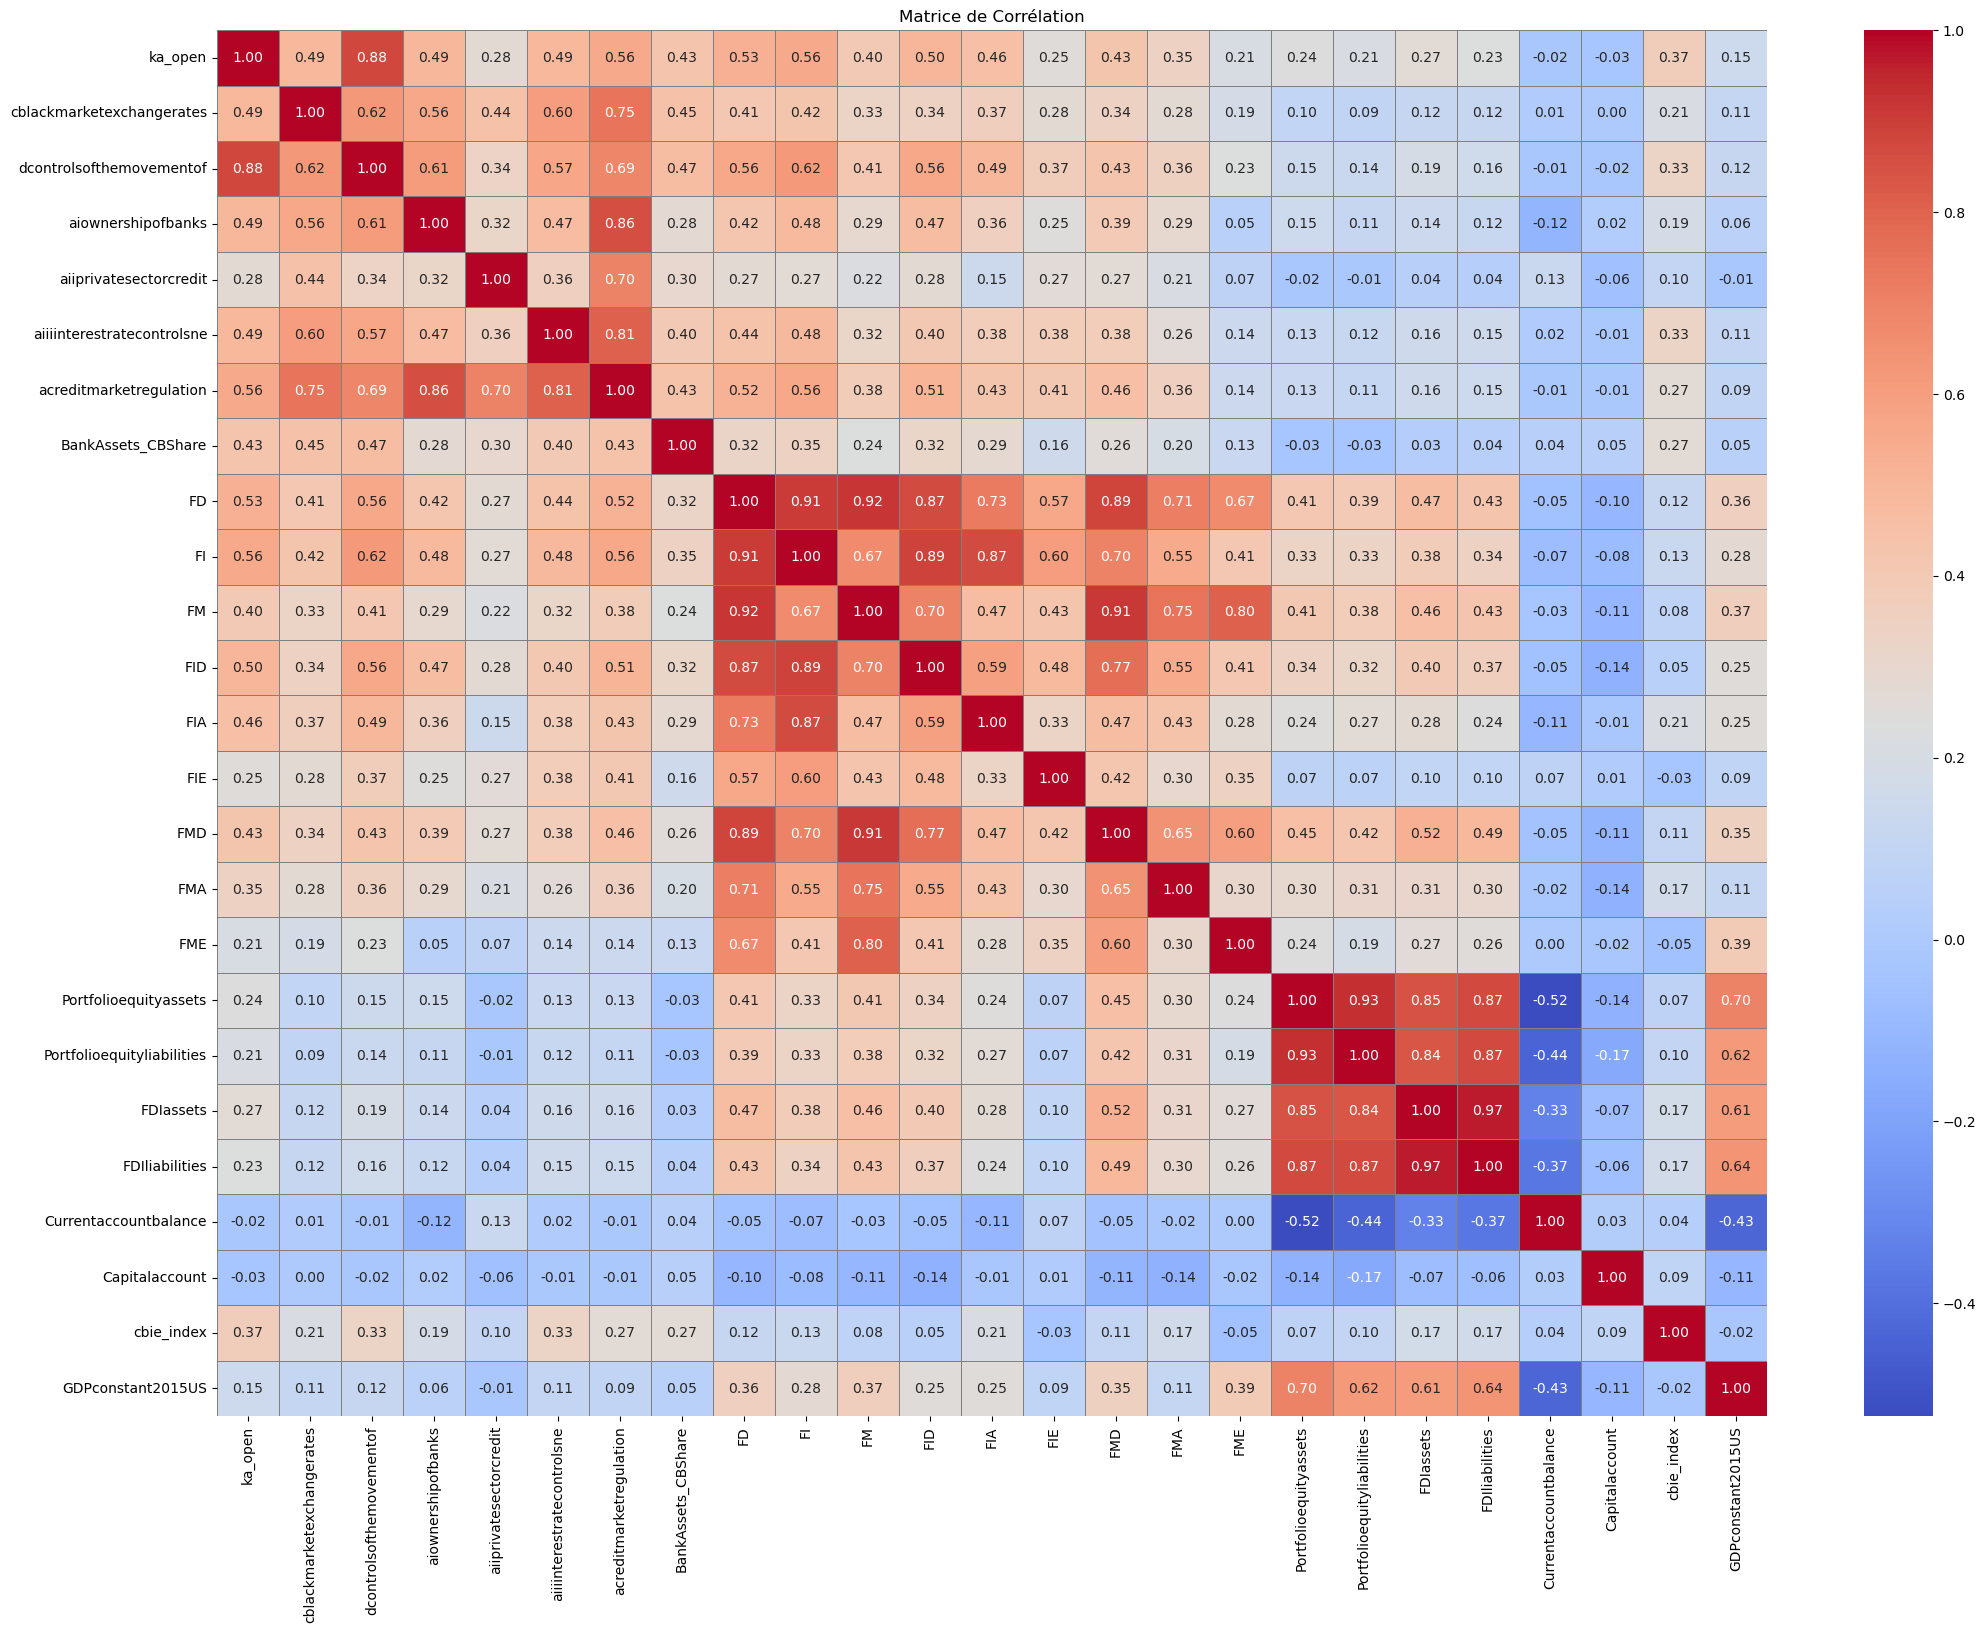

In [33]:
plot_corr(determinants_num_uncorr)

#### Indicateur de régularisation bancaire (a-*)

In [34]:
var_to_check = [s for s in determinants_num_uncorr.columns if s.startswith("ai") or s.startswith("ac")]

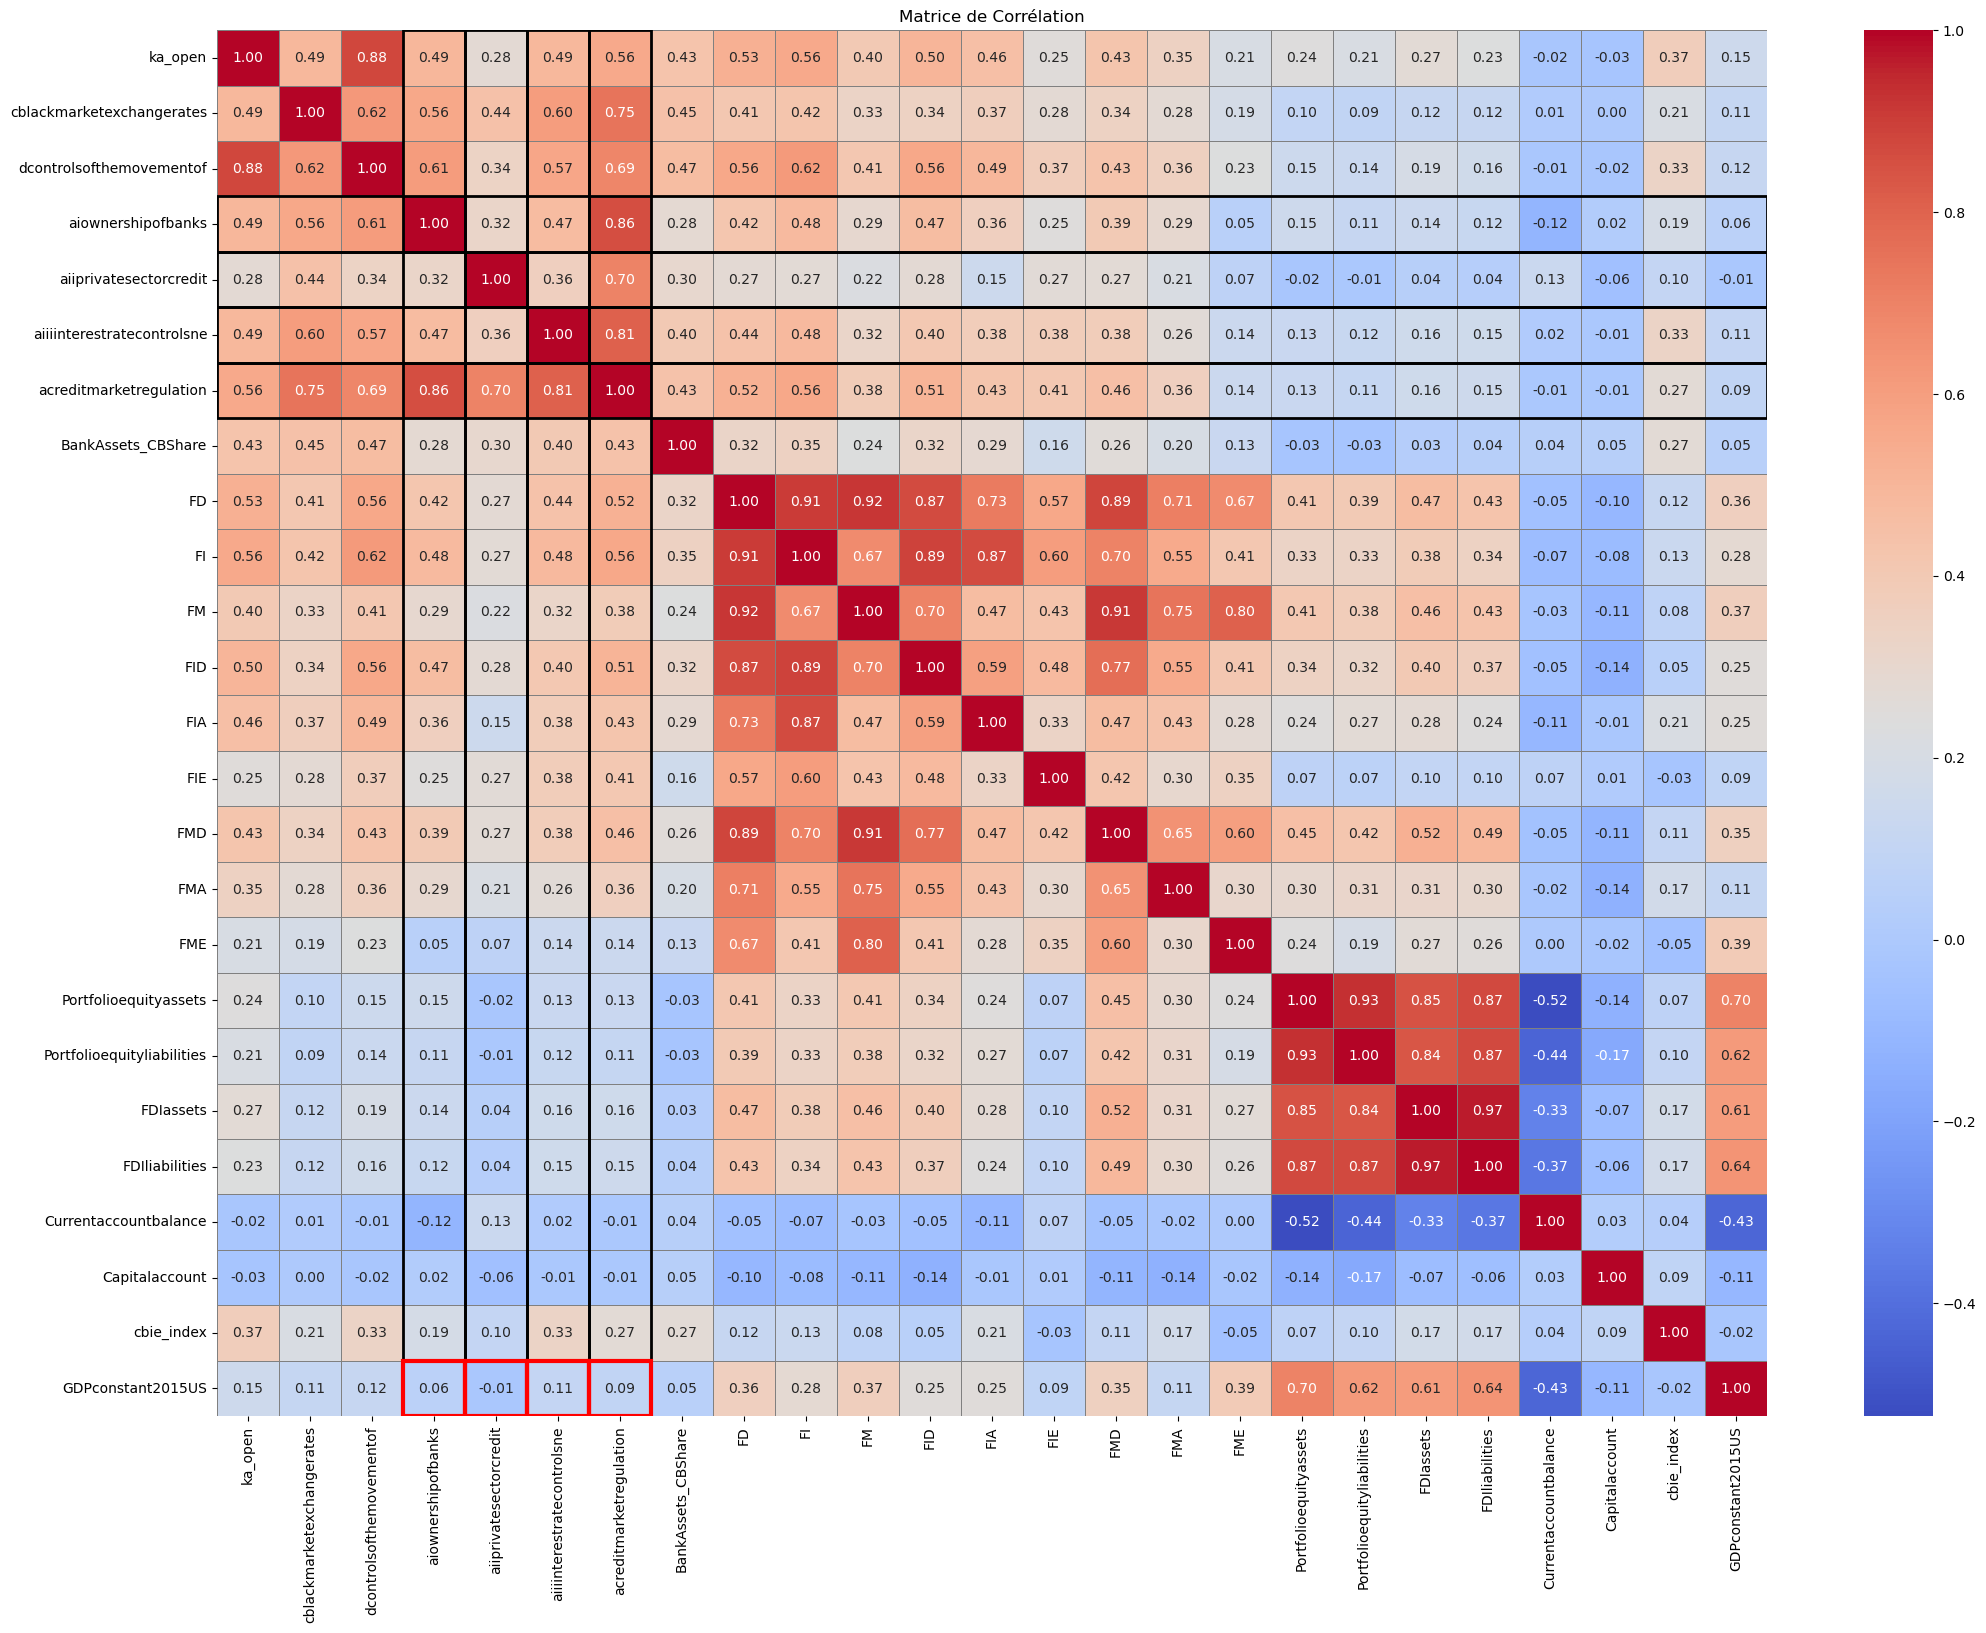

In [35]:
plot_corr(determinants_num_uncorr, var_to_check, target1)

In [36]:
for v in var_to_check:
  search_description(all_descriptions, v)

aiownershipofbanks: With this sub-component, data on the percentage of bank deposits held in privately owned banks were used to construct rating intervals. Countries with larger  shares of privately held deposits received higher ratings. When privately held deposits totaled between 95% and 100%, countries were given a rating of 10. When private deposits constituted between 75% and 95% of the total, a rating of 8 was assigned. When private deposits were between 40% and 75% of the total, the rating was 5. When private deposits totaled between 10% and 40%, countries received a rating of 2. A zero rating was assigned when private deposits were 10% or less of the total. Source: Fraser Institute
aiiprivatesectorcredit: With this sub-component, this component measures the extent of government borrowing relative to private-sector borrowing. Greater government borrowing indicates more central planning and results in lower ratings. If available, this sub-component is calculated as the government

On voit dans la définition de 'acreditmarketregulation' qu'elle représente dans son calcul également 'aiownershipofbanks', 'aiiprivatesectorcredit' et 'aiiiinterestratecontrolsne' (même s'il n'existe pas dans la tableau de description, on fait vite le lien).  
On en conclut qu'on va garder cette variable et supprimer les autres.

In [37]:
determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, var_to_check[:3])

Index(['ka_open', 'cblackmarketexchangerates', 'dcontrolsofthemovementof',
       'acreditmarketregulation', 'BankAssets_CBShare', 'FD', 'FI', 'FM',
       'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME', 'Portfolioequityassets',
       'Portfolioequityliabilities', 'FDIassets', 'FDIliabilities',
       'Currentaccountbalance', 'Capitalaccount', 'cbie_index',
       'GDPconstant2015US'],
      dtype='object')


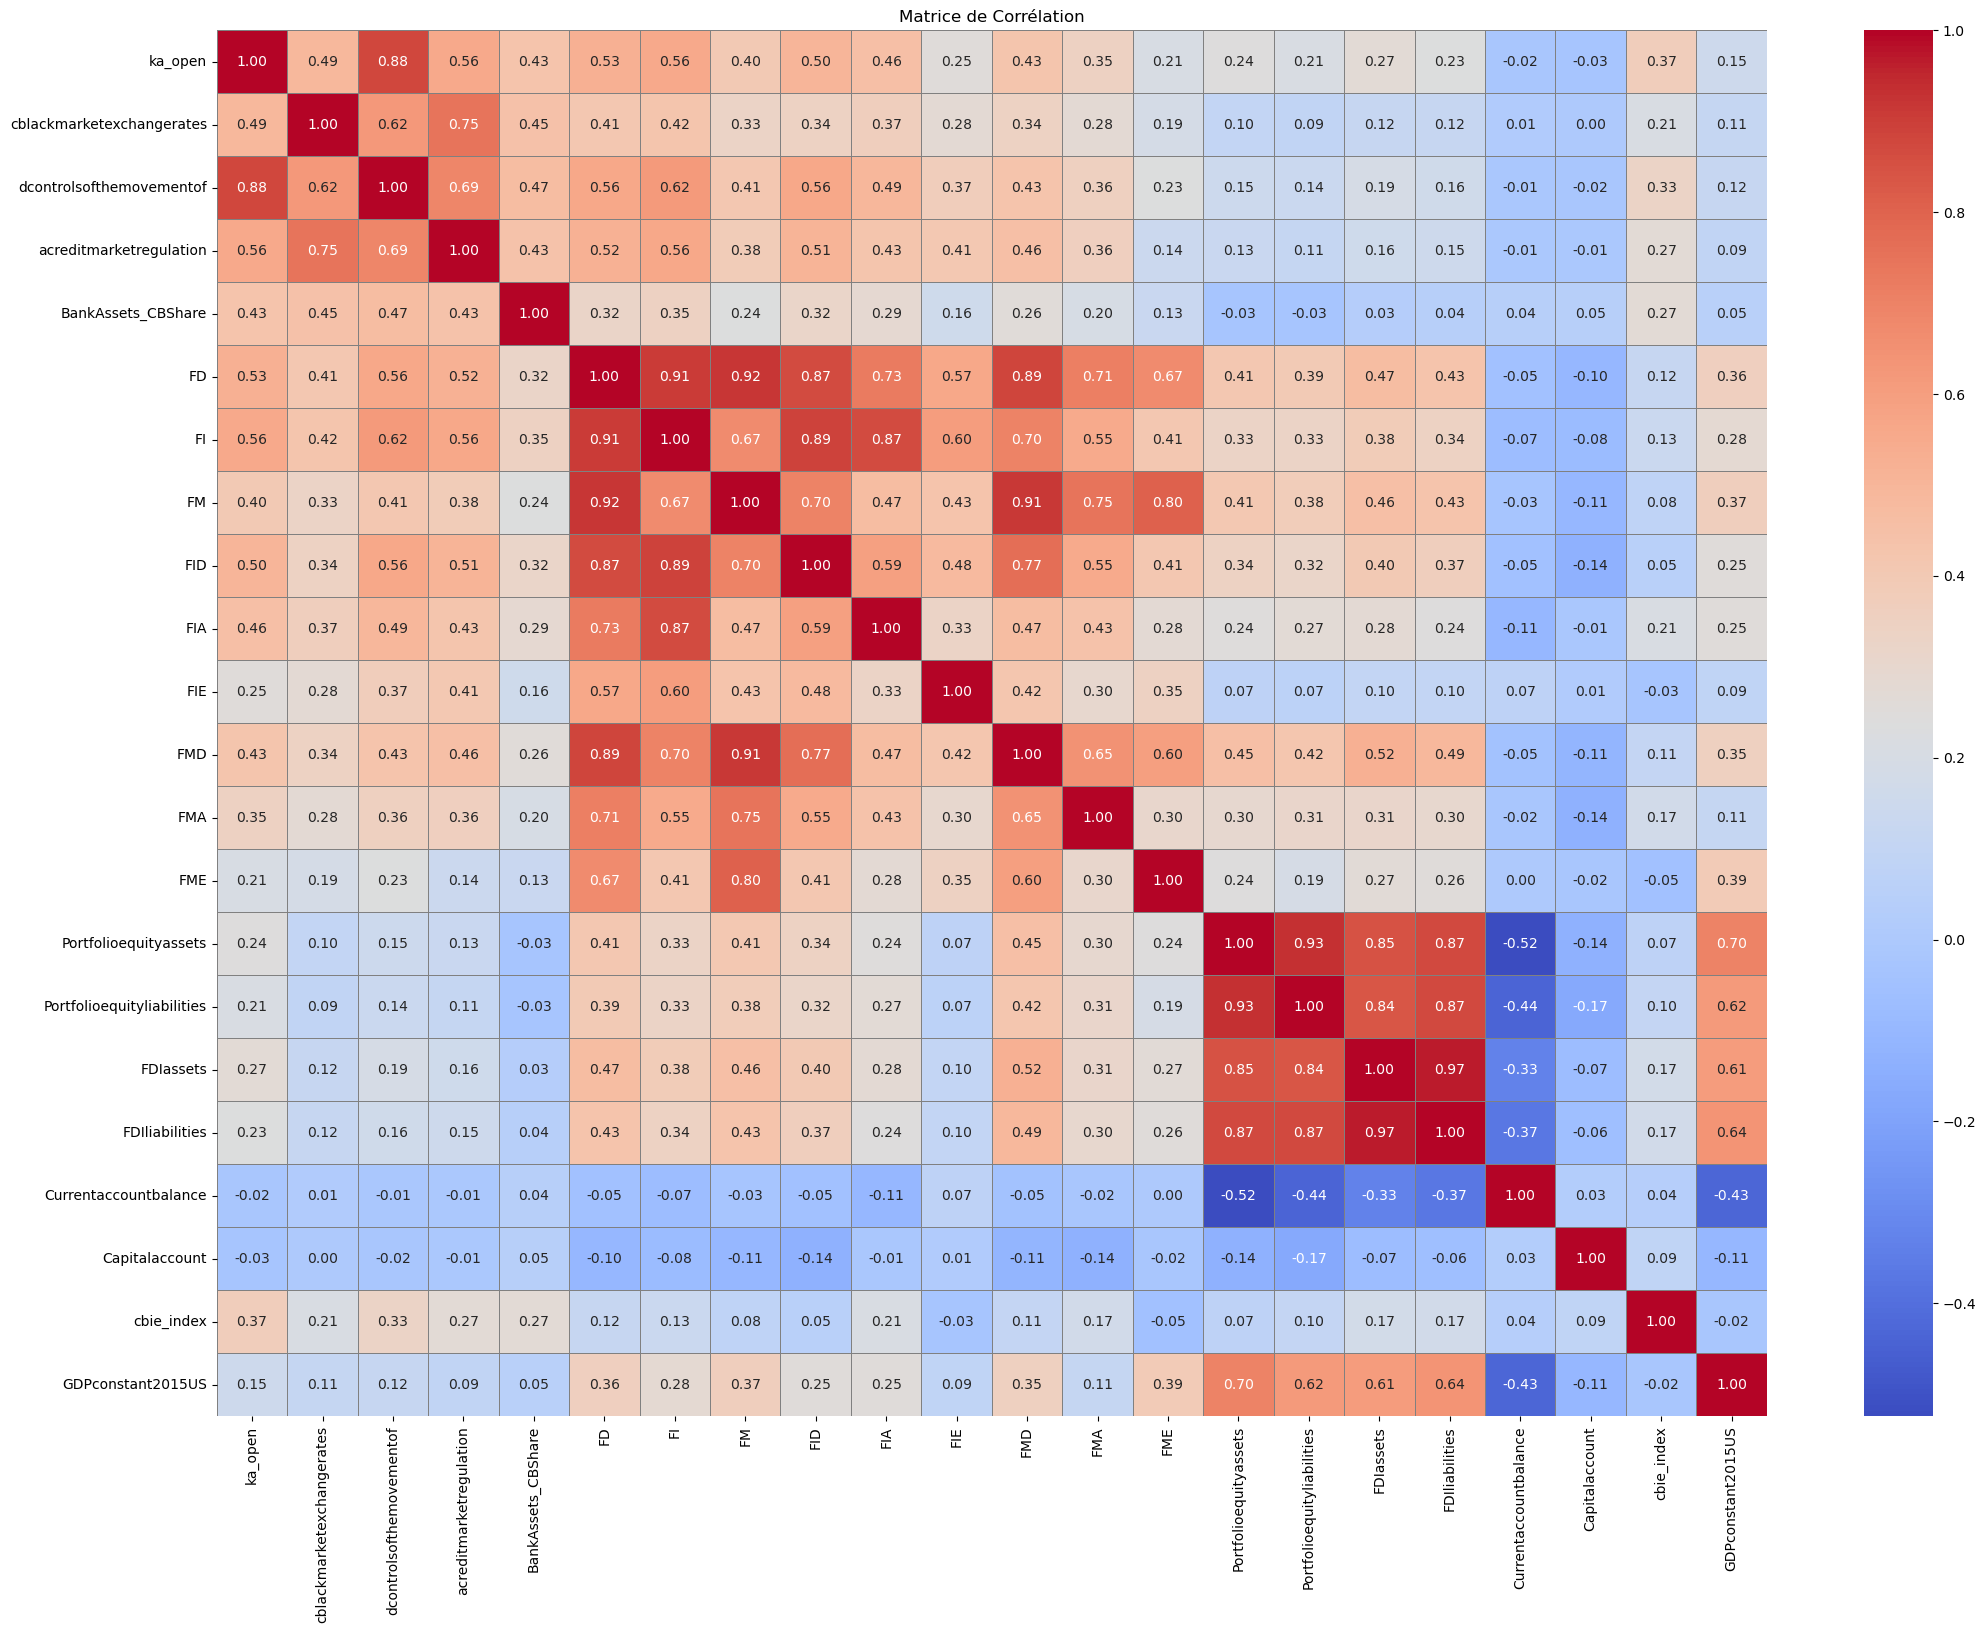

In [38]:
plot_corr(determinants_num_uncorr)

#### Financial direct assets et liabilities ('FDIassets' et 'FDIliabilities')

In [39]:
var_to_check = ['FDIassets', 'FDIliabilities']

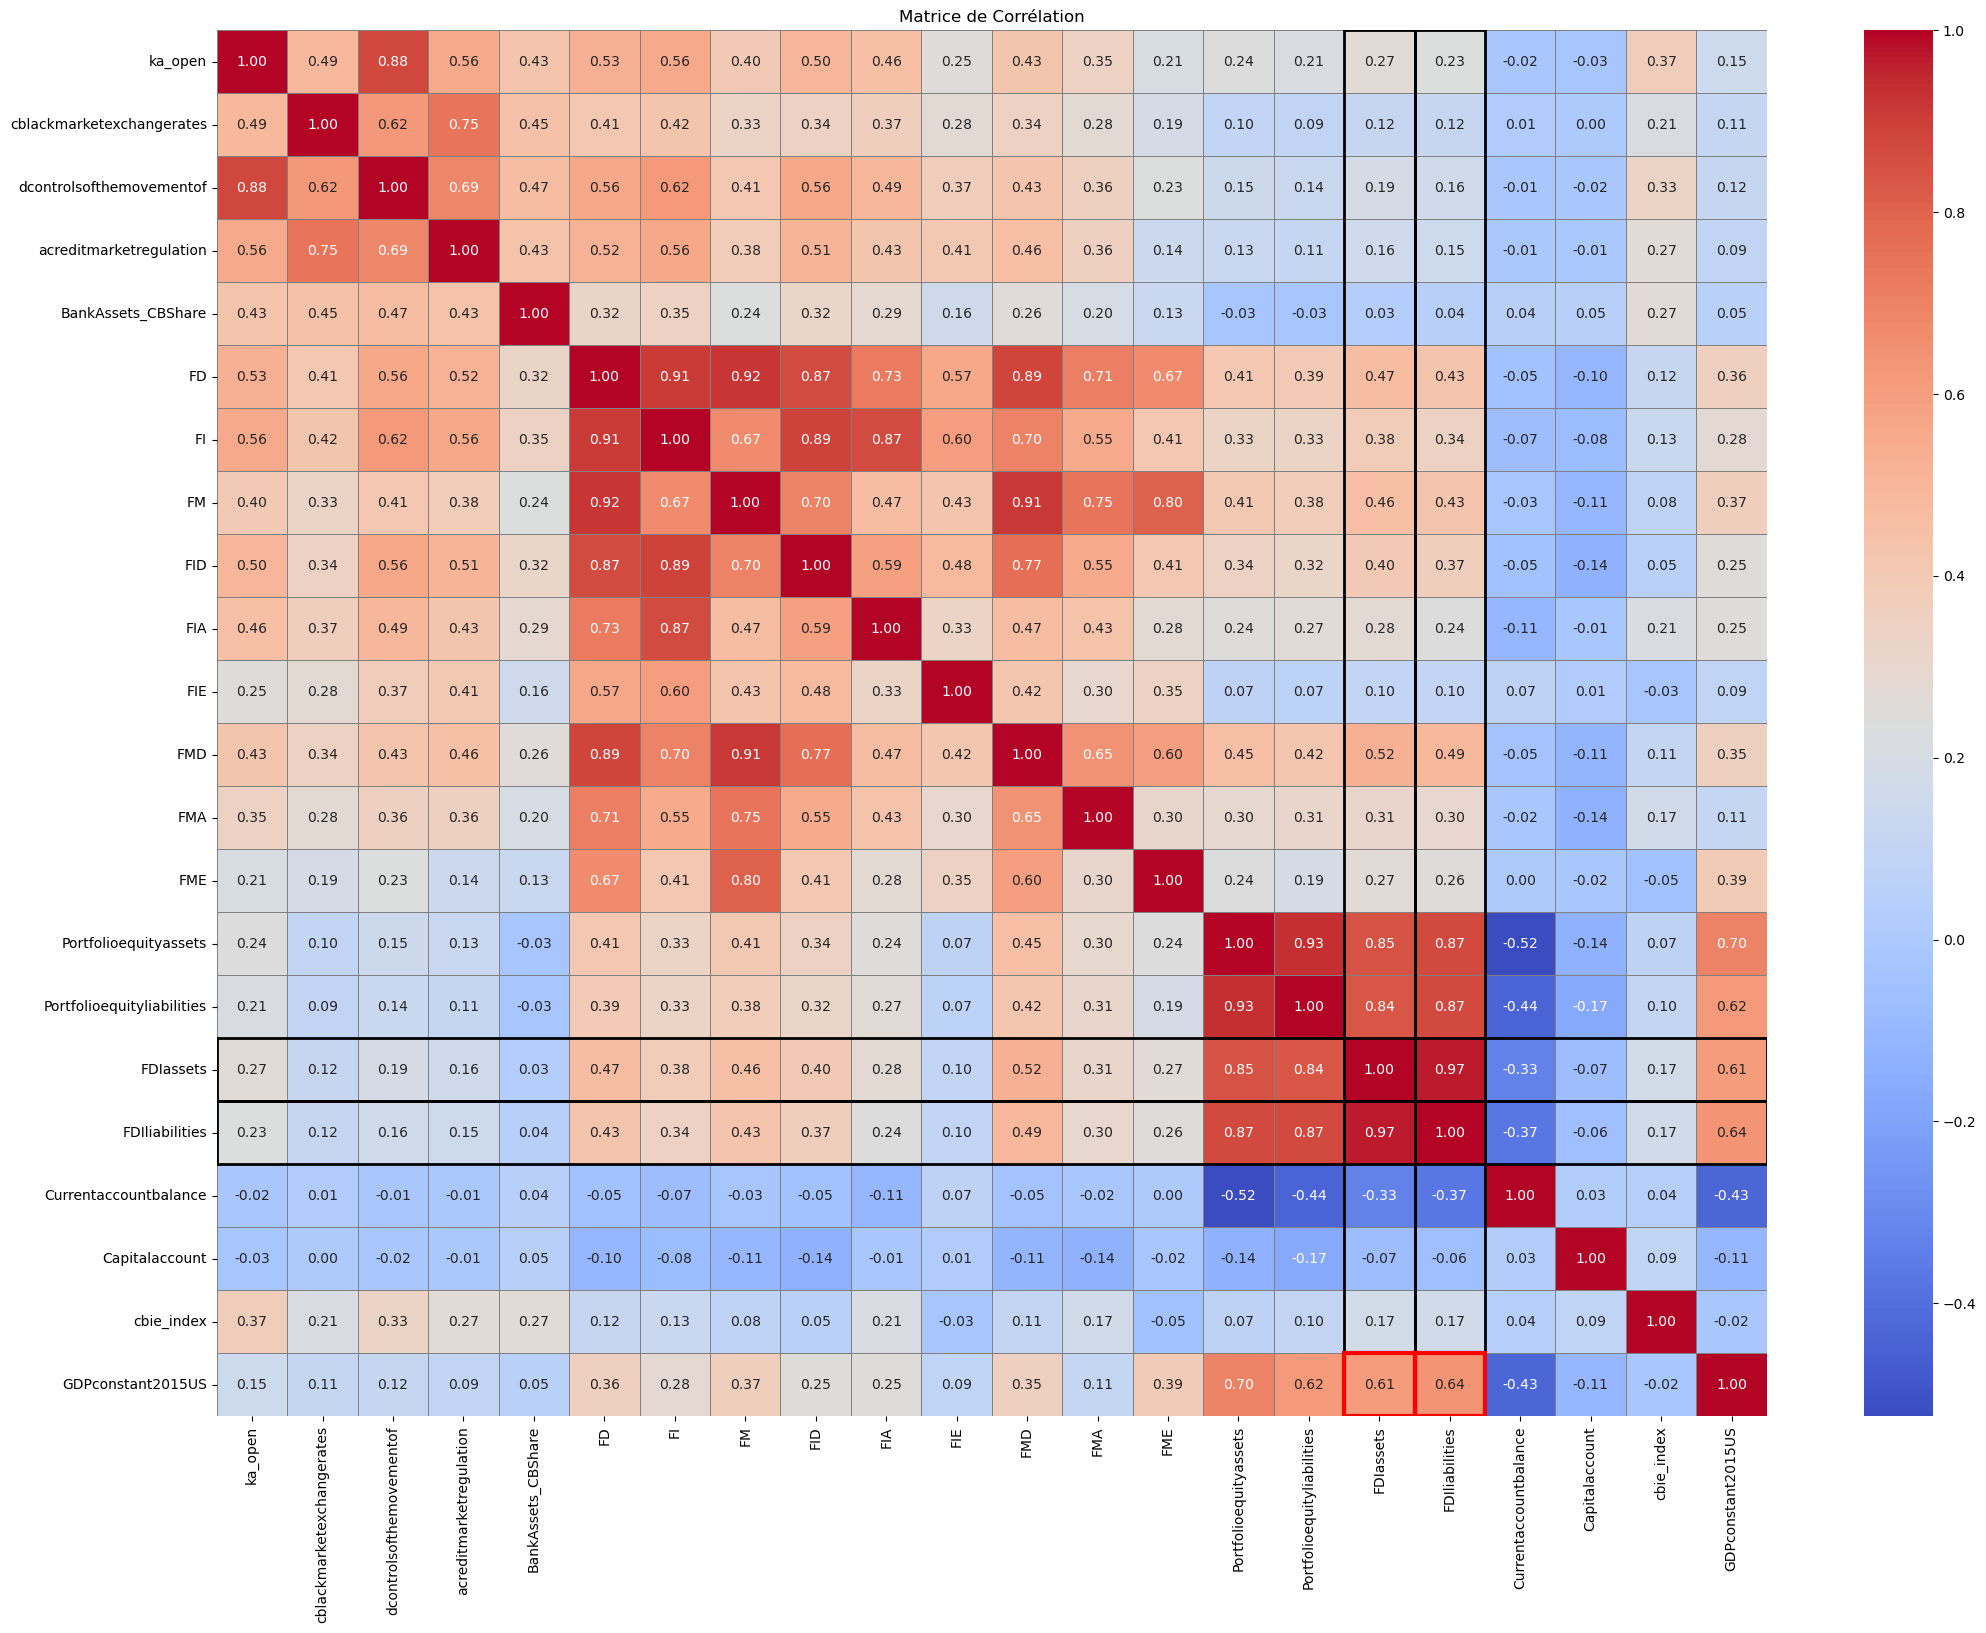

In [40]:
plot_corr(determinants_num_uncorr, var_to_check, target1)

In [41]:
for v in var_to_check:
  search_description(all_descriptions, v)

FDIassets: Stock of foreign direct investment abroad. All variables are reported in millions of current US dollars. All data on financial claims and liabilities are measured as of the end of the year. Source: The External Wealth of Nations. Lane and Milesi-Ferretti (2022)
FDIliabilities: Stock of foreign direct investment in the reporting economy. All variables are reported in millions of current US dollars. All data on financial claims and liabilities are measured as of the end of the year. Source: The External Wealth of Nations. Lane and Milesi-Ferretti (2022)


In [42]:
calculate_vif(determinants_num_uncorr, var_to_check)

c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([target], axis=1, inplace=True)


Variable        VIF
0       FDIassets  18.418614
1  FDIliabilities  18.418614

In [43]:
calculate_vif(determinants_num_uncorr)

c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([target], axis=1, inplace=True)


Variable           VIF
0                      ka_open  2.097382e+01
1    cblackmarketexchangerates  6.787184e+01
2     dcontrolsofthemovementof  3.750900e+01
3      acreditmarketregulation  5.032642e+01
4           BankAssets_CBShare  7.270413e+01
5                           FD  2.144571e+14
6                           FI  2.370316e+14
7                           FM  1.637673e+14
8                          FID  3.116678e+13
9                          FIA  3.985486e+13
10                         FIE  1.668000e+13
11                         FMD  2.357906e+13
12                         FMA  1.605561e+13
13                         FME  2.664852e+13
14       Portfolioequityassets  1.243884e+01
15  Portfolioequityliabilities  1.117688e+01
16                   FDIassets  2.171102e+01
17              FDIliabilities  2.278287e+01
18       Currentaccountbalance  1.593843e+00
19              Capitalaccount  1.157743e+00
20                  cbie_index  1.661357e+01

In [44]:
run_comparative_ols(determinants_num_uncorr, target1, var_to_check)

OLS target1 ~ ['FDIassets', 'FDIliabilities']
                            OLS Regression Results                            
Dep. Variable:      GDPconstant2015US   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     669.2
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          6.30e-218
Time:                        18:30:26   Log-Likelihood:                -2053.1
No. Observations:                1800   AIC:                             4112.
Df Residuals:                    1797   BIC:                             4129.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

On voit qu'ils ont tout deux le même VIF et sont significatif à 1% dans la regression jointe.  
En revanche, FDIliabilities a un meilleur R² dans la regression simple sur la variable dépendante et sa corrélation avec cette dernière est un peu plus forte.  
Nous choisissons donc de garder FDIliabilities. 

In [45]:
determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, [var_to_check[0]])

Index(['ka_open', 'cblackmarketexchangerates', 'dcontrolsofthemovementof',
       'acreditmarketregulation', 'BankAssets_CBShare', 'FD', 'FI', 'FM',
       'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME', 'Portfolioequityassets',
       'Portfolioequityliabilities', 'FDIliabilities', 'Currentaccountbalance',
       'Capitalaccount', 'cbie_index', 'GDPconstant2015US'],
      dtype='object')


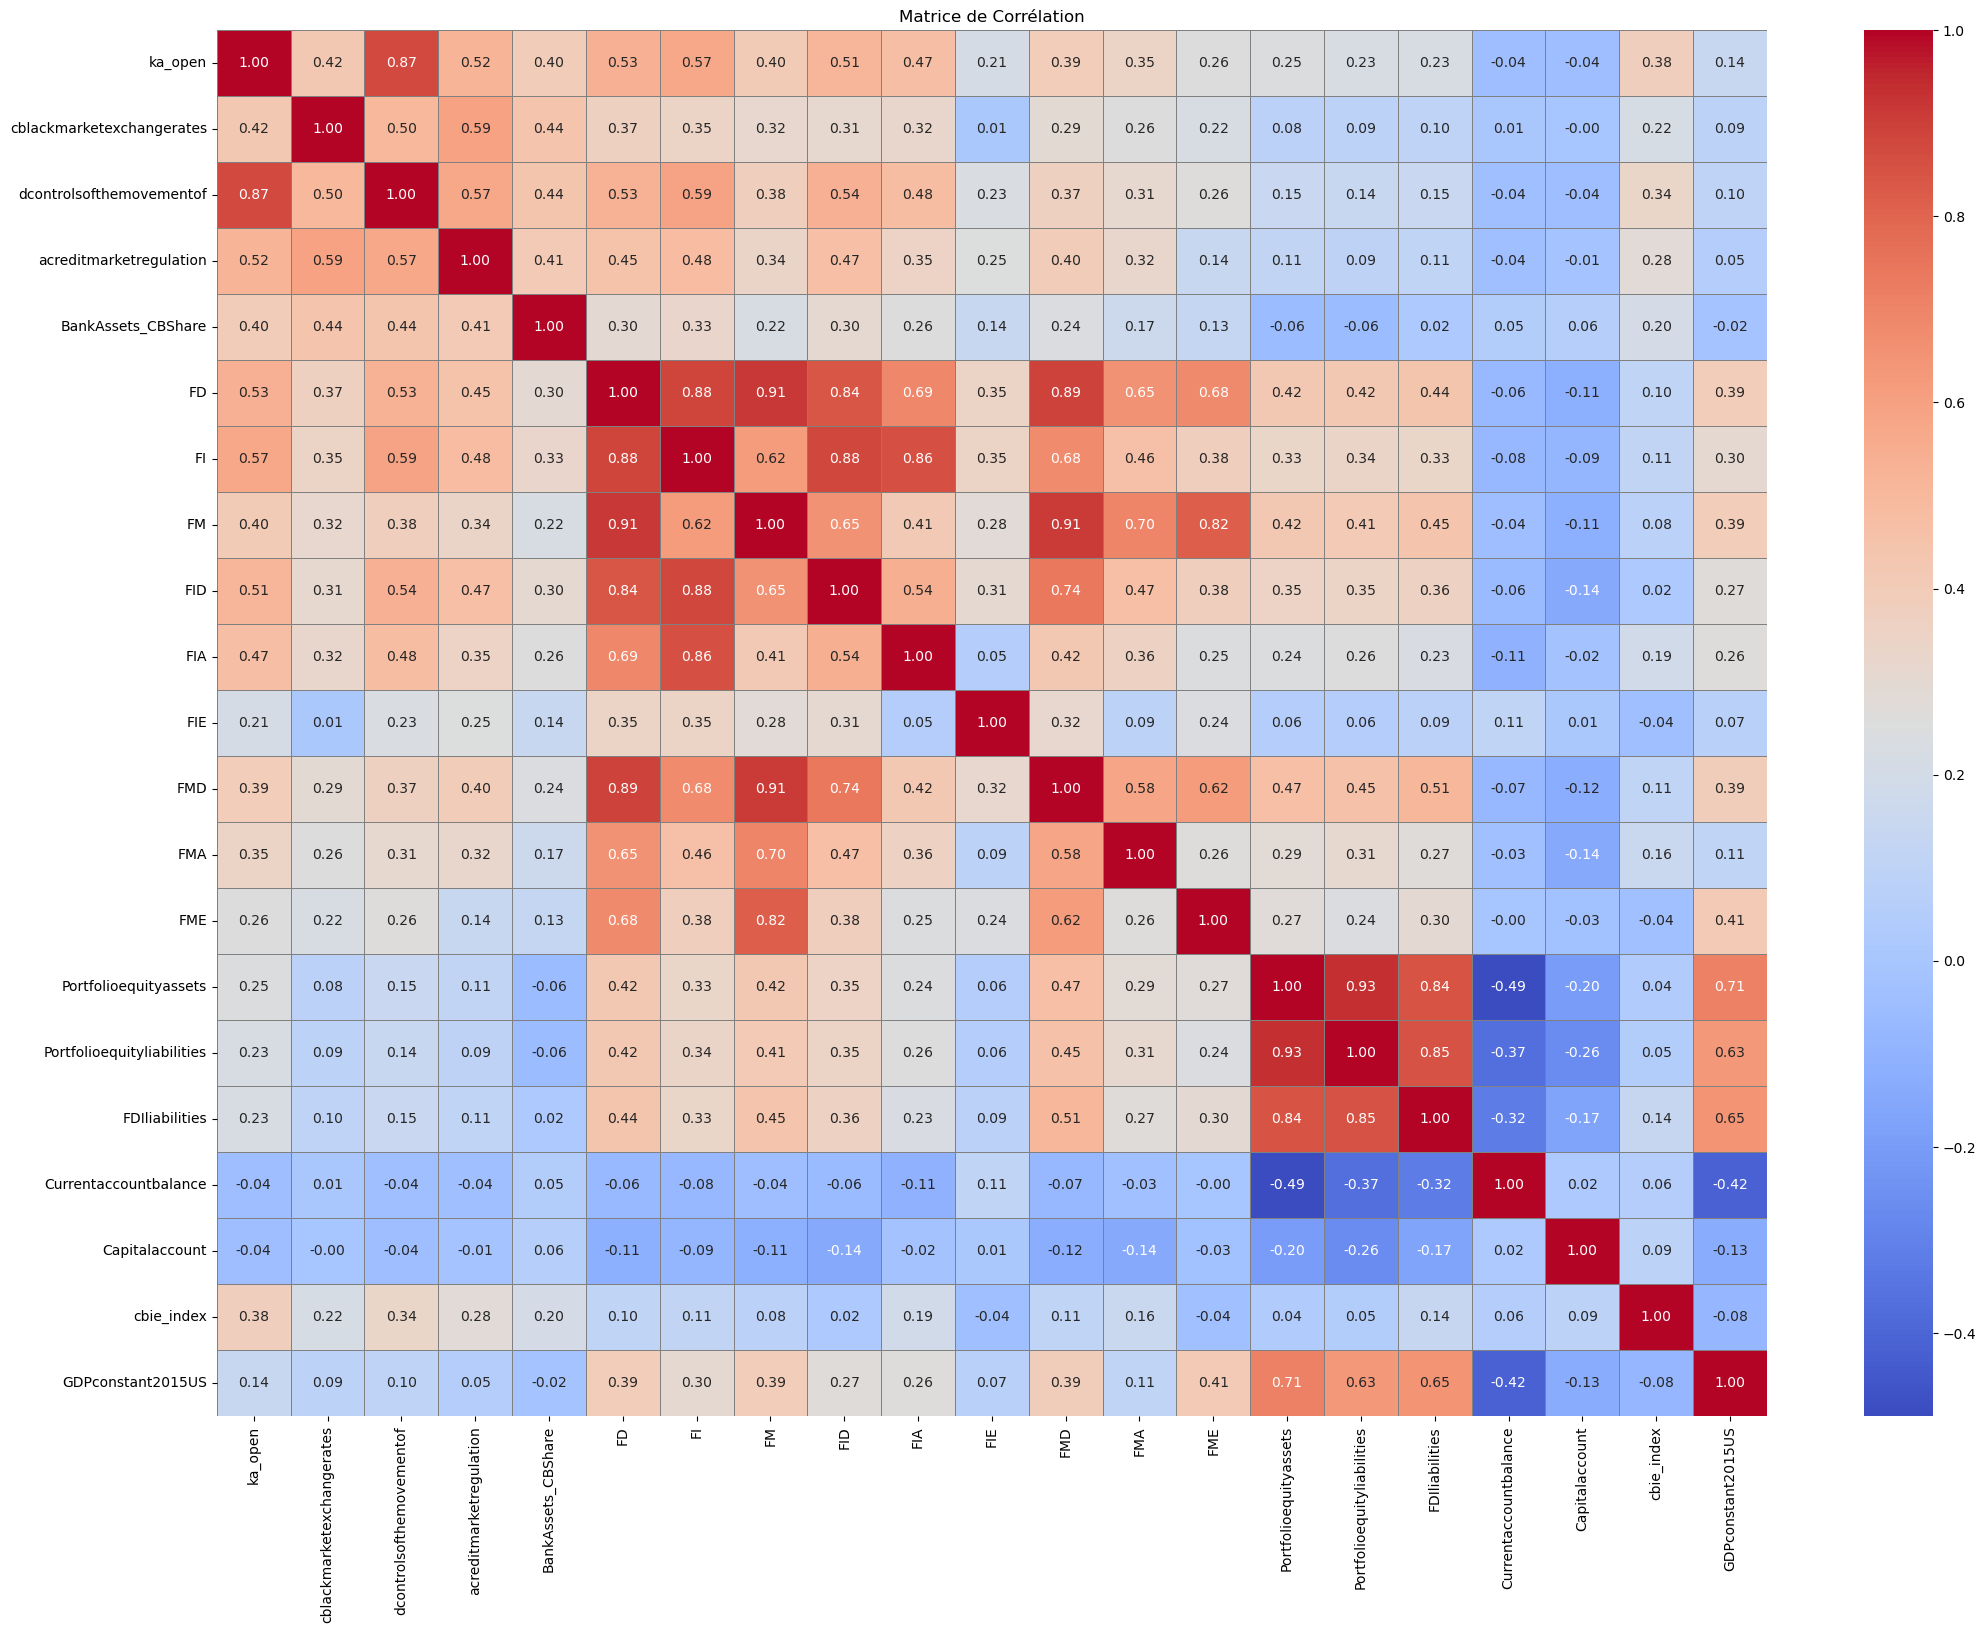

In [46]:
plot_corr(determinants_num_uncorr)

#### Portfolio equity assets et liabilities ('Portfolioequityassets', 'Portfolioequityliabilities', 'FDIliabilities')

In [47]:
var_to_check = ['Portfolioequityassets', 'Portfolioequityliabilities', 'FDIliabilities']

In [48]:
for v in var_to_check:
  search_description(all_descriptions, v)

Portfolioequityassets: Stock of financial claims on nonresidents in portfolio equity securities. All variables are reported in millions of current US dollars. All data on financial claims and liabilities are measured as of the end of the year. Source: The External Wealth of Nations. Lane and Milesi-Ferretti (2022)
Portfolioequityliabilities: Stock of financial liabilities to nonresidents in portfolio equity securities. All variables are reported in millions of current US dollars. All data on financial claims and liabilities are measured as of the end of the year. Source: The External Wealth of Nations. Lane and Milesi-Ferretti (2022)
FDIliabilities: Stock of foreign direct investment in the reporting economy. All variables are reported in millions of current US dollars. All data on financial claims and liabilities are measured as of the end of the year. Source: The External Wealth of Nations. Lane and Milesi-Ferretti (2022)


In [49]:
calculate_vif(determinants_num_uncorr)

Variable           VIF
0                      ka_open  2.091022e+01
1    cblackmarketexchangerates  6.782594e+01
2     dcontrolsofthemovementof  3.735995e+01
3      acreditmarketregulation  5.031171e+01
4           BankAssets_CBShare  7.265224e+01
5                           FD  2.144571e+14
6                           FI  2.370316e+14
7                           FM  1.637673e+14
8                          FID  3.116678e+13
9                          FIA  3.967929e+13
10                         FIE  1.668000e+13
11                         FMD  2.357906e+13
12                         FMA  1.605561e+13
13                         FME  2.664852e+13
14       Portfolioequityassets  1.215032e+01
15  Portfolioequityliabilities  1.107601e+01
16              FDIliabilities  5.075537e+00
17       Currentaccountbalance  1.580545e+00
18              Capitalaccount  1.137282e+00
19                  cbie_index  1.661275e+01

In [50]:
calculate_vif(determinants_num_uncorr, var_to_check, target1)

Variable       VIF
0       Portfolioequityassets  8.895959
1  Portfolioequityliabilities  9.363782
2              FDIliabilities  4.240792

In [51]:
calculate_vif(determinants_num_uncorr, var_to_check[:2], target1)

Variable       VIF
0       Portfolioequityassets  8.277763
1  Portfolioequityliabilities  8.277763

In [52]:
calculate_vif(determinants_num_uncorr, [var_to_check[0], var_to_check[2]], target1)

Variable       VIF
0  Portfolioequityassets  3.748942
1         FDIliabilities  3.748942

In [53]:
calculate_vif(determinants_num_uncorr, [var_to_check[1], var_to_check[2]], target1)

Variable       VIF
0  Portfolioequityliabilities  3.946092
1              FDIliabilities  3.946092

Portfolioequityliabilities est d'avantage corrélé avec FDIliabilities que Portfolioequityassets avec FDIliabilities. 
FDIliabilities est beaucoup moins corrélé avec les 2 autres variables, donc ce n'est surement pas elle le "problème".

In [54]:
run_comparative_ols(determinants_num_uncorr, target1, var_to_check[:2])

OLS target1 ~ ['Portfolioequityassets', 'Portfolioequityliabilities']
                            OLS Regression Results                            
Dep. Variable:      GDPconstant2015US   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     958.1
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          6.28e-284
Time:                        18:30:28   Log-Likelihood:                -1900.9
No. Observations:                1800   AIC:                             3808.
Df Residuals:                    1797   BIC:                             3824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

On voit que Portfolioequityassets a un meilleur pouvoir prédictif individuel, il faut donc la garder.  
On choisit donc de supprimer Portfolioequityliabilities.

In [55]:
determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, ['Portfolioequityliabilities'])

Index(['ka_open', 'cblackmarketexchangerates', 'dcontrolsofthemovementof',
       'acreditmarketregulation', 'BankAssets_CBShare', 'FD', 'FI', 'FM',
       'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME', 'Portfolioequityassets',
       'FDIliabilities', 'Currentaccountbalance', 'Capitalaccount',
       'cbie_index', 'GDPconstant2015US'],
      dtype='object')


In [56]:
var_to_check = ['Portfolioequityassets', 'FDIliabilities']
run_comparative_ols(determinants_num_uncorr, target1, var_to_check)

OLS target1 ~ ['Portfolioequityassets', 'FDIliabilities']
                            OLS Regression Results                            
Dep. Variable:      GDPconstant2015US   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     956.3
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.47e-283
Time:                        18:30:28   Log-Likelihood:                -1901.8
No. Observations:                1800   AIC:                             3810.
Df Residuals:                    1797   BIC:                             3826.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Portfolioequityassets a un meilleur pouvoir prédictif que FDIliabilities.  
On supprime donc FDIliabilities.

In [57]:
determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, ['FDIliabilities'])

Index(['ka_open', 'cblackmarketexchangerates', 'dcontrolsofthemovementof',
       'acreditmarketregulation', 'BankAssets_CBShare', 'FD', 'FI', 'FM',
       'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME', 'Portfolioequityassets',
       'Currentaccountbalance', 'Capitalaccount', 'cbie_index',
       'GDPconstant2015US'],
      dtype='object')


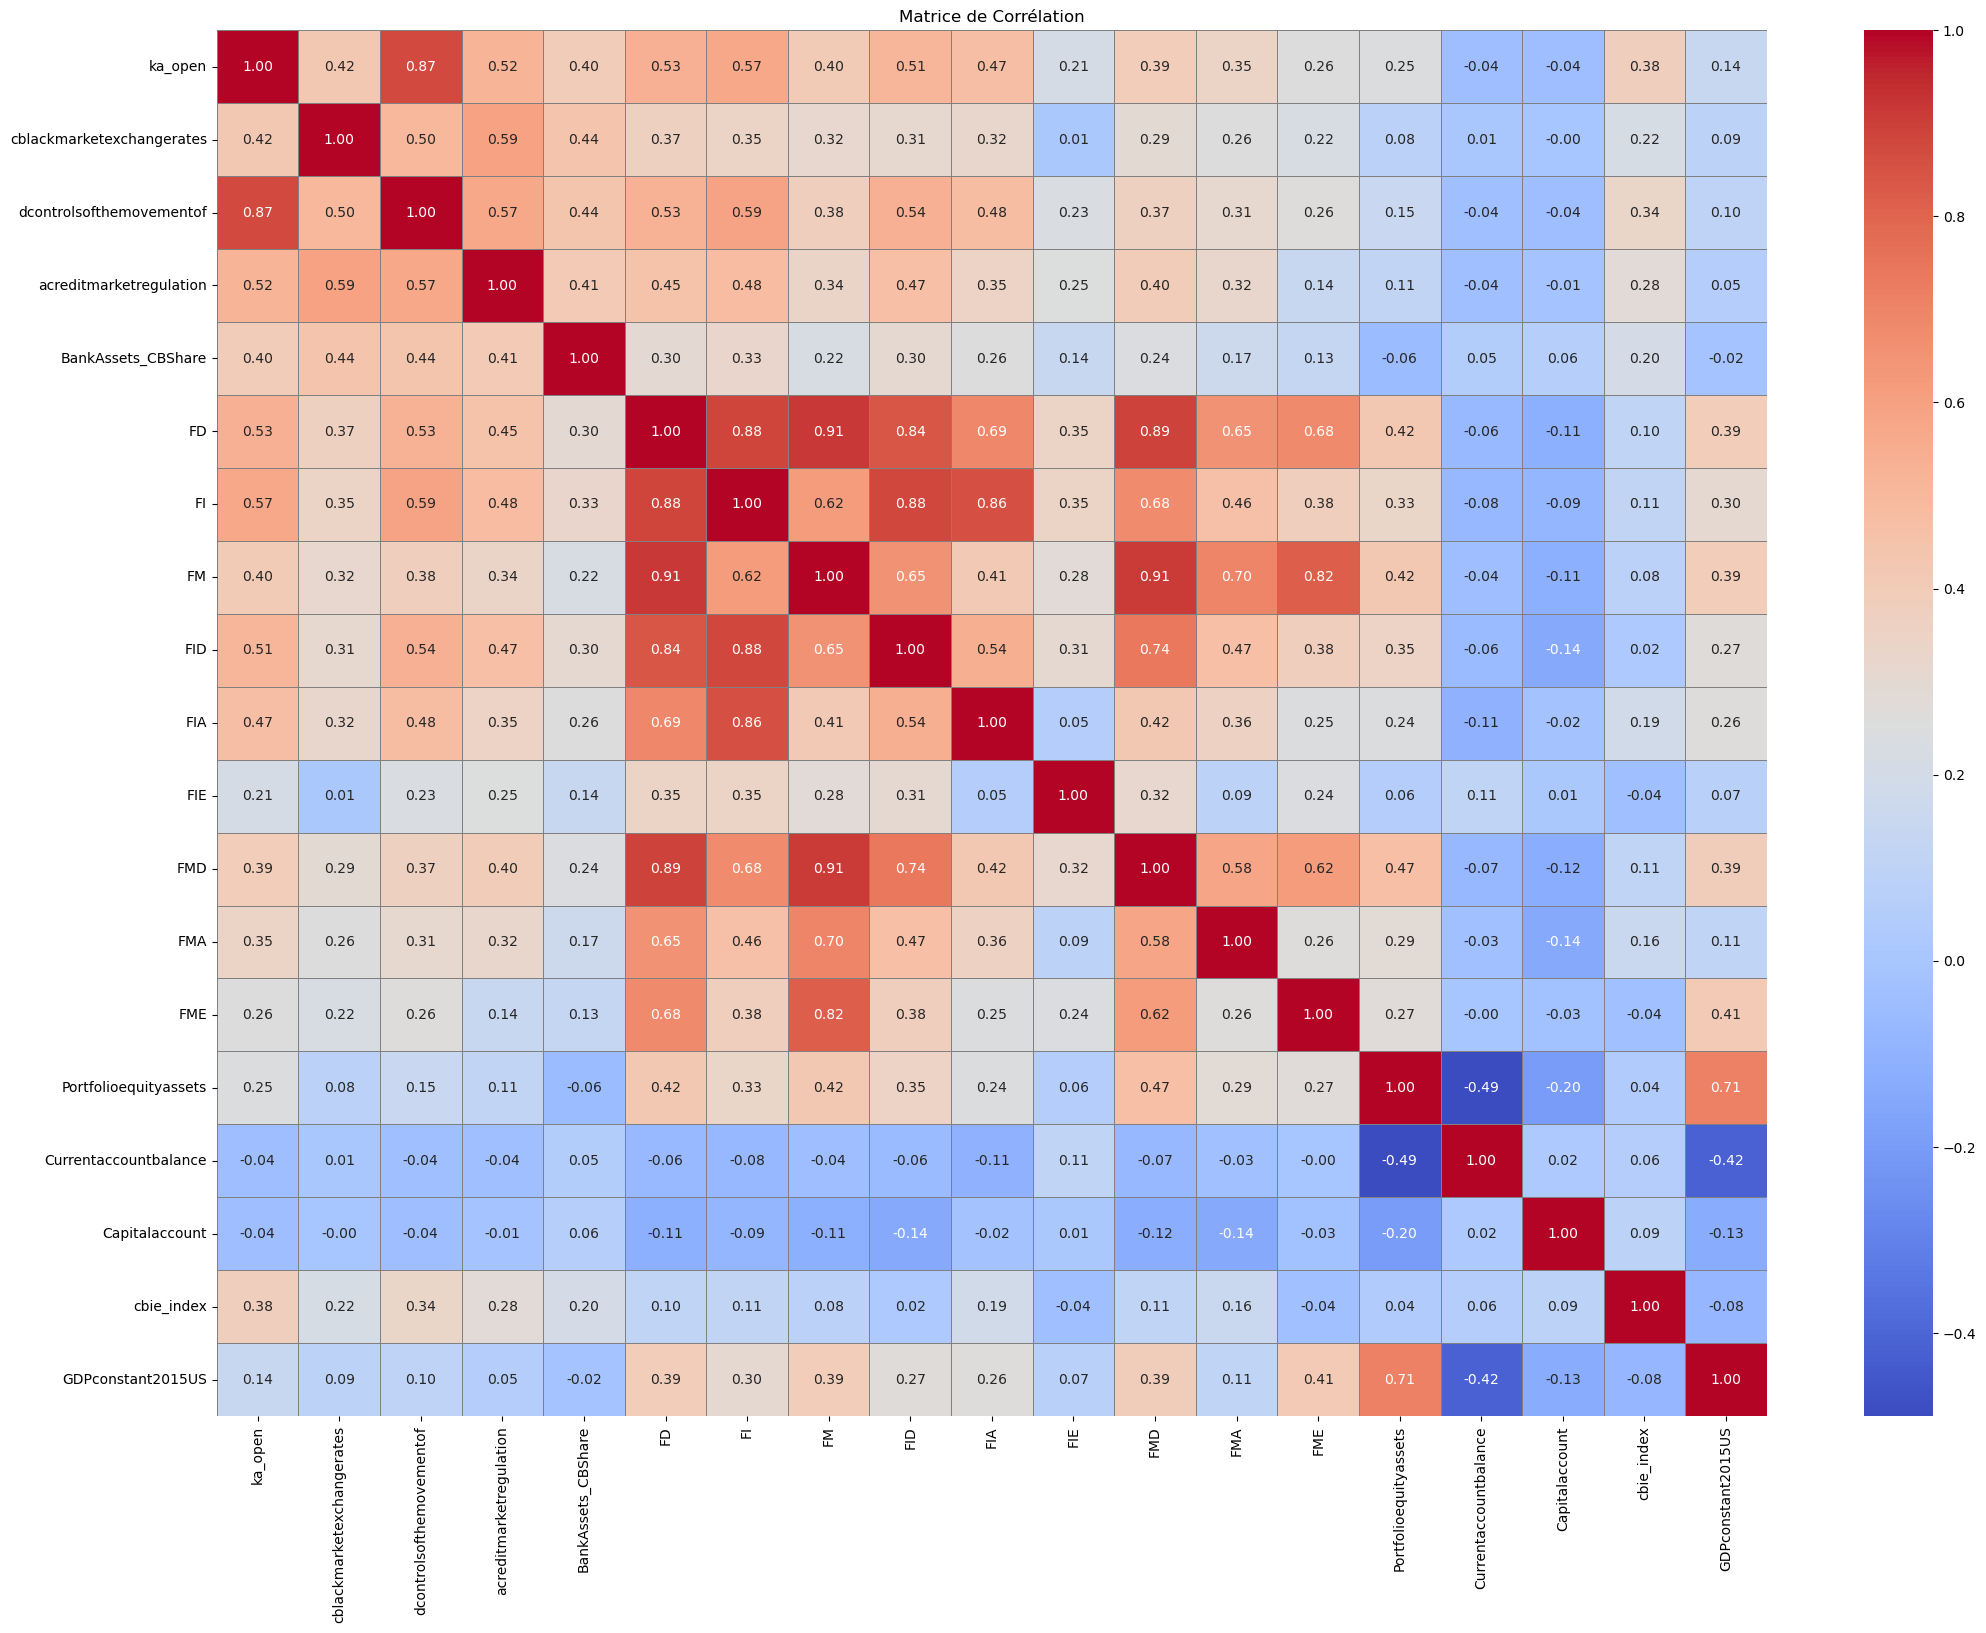

In [58]:
plot_corr(determinants_num_uncorr)

#### Indice financier (F*)

In [59]:
var_to_check = [s for s in determinants_num_uncorr.columns if s.startswith("F")]
var_to_check

['FD', 'FI', 'FM', 'FID', 'FIA', 'FIE', 'FMD', 'FMA', 'FME']

In [60]:
calculate_vif(determinants_num_uncorr, var_to_check)

Variable           VIF
0       FD  2.094698e+14
1       FI  2.370316e+14
2       FM  1.608428e+14
3      FID  3.095257e+13
4      FIA  3.950526e+13
5      FIE  1.655735e+13
6      FMD  2.333471e+13
7      FMA  1.591378e+13
8      FME  2.641407e+13

On voit que les VIF de ces 9 variables d'indice financier sont très forts.

In [61]:
for v in var_to_check:
  search_description(all_descriptions, v)

FD: Financial development index. Source: IMF Financial Structure
FI: Financial institutions. Source: IMF Financial Structure
FM: Financial markets. Source: IMF Financial Structure
FID: Financial institutions depth. Source: IMF Financial Structure
FIA: Financial institutions access. Source: IMF Financial Structure
FIE: Financial institutions efficiency. Source: IMF Financial Structure
FMD: Financial markets depth. Source: IMF Financial Structure
FMA: Financial markets access. Source: IMF Financial Structure
FME: FME: Financial markets efficiency. Source: IMF Financial Structure


On donc qu'en réalité, il y a un lien hiérarchique dans ces variables :
- FD :
  - FI:
    - FID
    - FIA
    - FIE
  - FM :
    - FMA
    - FME
    - FMD
  
Il faut donc choisir entre les 3 niveaux de la hiérarchie.

In [62]:
# Level 1
run_ols_for_significance_var(determinants_num_uncorr, target1, ['FD'])

                            OLS Regression Results                            
Dep. Variable:      GDPconstant2015US   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           2.62e-66
Time:                        18:30:29   Log-Likelihood:                -2405.9
No. Observations:                1800   AIC:                             4816.
Df Residuals:                    1798   BIC:                             4827.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.296e-17      0.022  -1.52e-15      1.0

In [63]:
calculate_vif(determinants_num_uncorr.drop(['FI', 'FM', 'FID', 'FIA', 'FIE', 'FMA', 'FME', 'FMD'], axis=1))

Variable        VIF
0                    ka_open  20.447963
1  cblackmarketexchangerates  63.389095
2   dcontrolsofthemovementof  35.429847
3    acreditmarketregulation  43.855555
4         BankAssets_CBShare  54.906658
5                         FD  11.460038
6      Portfolioequityassets   2.019275
7      Currentaccountbalance   1.412736
8             Capitalaccount   1.066923
9                 cbie_index  14.359450

In [64]:
# Level 2
run_comparative_ols(determinants_num_uncorr, target1, ['FI', 'FM'])

OLS target1 ~ ['FI', 'FM']
                            OLS Regression Results                            
Dep. Variable:      GDPconstant2015US   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.22e-68
Time:                        18:30:29   Log-Likelihood:                -2397.5
No. Observations:                1800   AIC:                             4801.
Df Residuals:                    1797   BIC:                             4817.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.296e-17    

In [65]:
calculate_vif(determinants_num_uncorr, ['FI', 'FM'])

Variable       VIF
0       FI  5.448519
1       FM  5.448519

In [66]:
calculate_vif(determinants_num_uncorr.drop(['FD', 'FID', 'FIA', 'FIE', 'FMA', 'FME', 'FMD'], axis=1))

Variable        VIF
0                     ka_open  20.449470
1   cblackmarketexchangerates  64.042548
2    dcontrolsofthemovementof  36.170724
3     acreditmarketregulation  44.530876
4          BankAssets_CBShare  56.261487
5                          FI  17.450355
6                          FM   6.277273
7       Portfolioequityassets   2.031843
8       Currentaccountbalance   1.420568
9              Capitalaccount   1.066936
10                 cbie_index  14.408556

In [67]:
# Level 3
run_comparative_ols(determinants_num_uncorr, target1, ['FID', 'FIA', 'FIE', 'FMA', 'FME', 'FMD'])

OLS target1 ~ ['FID', 'FIA', 'FIE', 'FMA', 'FME', 'FMD']
                            OLS Regression Results                            
Dep. Variable:      GDPconstant2015US   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     90.85
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          9.95e-100
Time:                        18:30:29   Log-Likelihood:                -2315.2
No. Observations:                1800   AIC:                             4644.
Df Residuals:                    1793   BIC:                             4683.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [68]:
calculate_vif(determinants_num_uncorr, ['FID', 'FIA', 'FIE', 'FMA', 'FME', 'FMD'])

Variable       VIF
0      FID  9.821265
1      FIA  5.635143
2      FIE  5.601257
3      FMA  4.474835
4      FME  4.143397
5      FMD  8.715979

On voit que le niveau 3 de la hiérarchie a un meilleur R² que les 2 autres niveaux. Toutefois, la variable FID n'est pas significative dans le modèle. De plus, les VIF restent assez élevé entre eux.  
Cela signifie qu'il y a une incohérence dans ces variables, ils ne sont pas bien séparés ou il y a des liens non linéaires entre elles.  
On décide donc de ne pas garder la hiérarchie niveau 3.  
  
La hiérarchie 2 est intéressante mais présente un fort VIF avec le reste des variables...  
Il serait donc plus adéquat de rester sur le niveau 1.

In [69]:
var_to_remove = ['FID', 'FIA', 'FIE', 'FMA', 'FME', 'FMD', 'FI', 'FM']
determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, var_to_remove)

Index(['ka_open', 'cblackmarketexchangerates', 'dcontrolsofthemovementof',
       'acreditmarketregulation', 'BankAssets_CBShare', 'FD',
       'Portfolioequityassets', 'Currentaccountbalance', 'Capitalaccount',
       'cbie_index', 'GDPconstant2015US'],
      dtype='object')


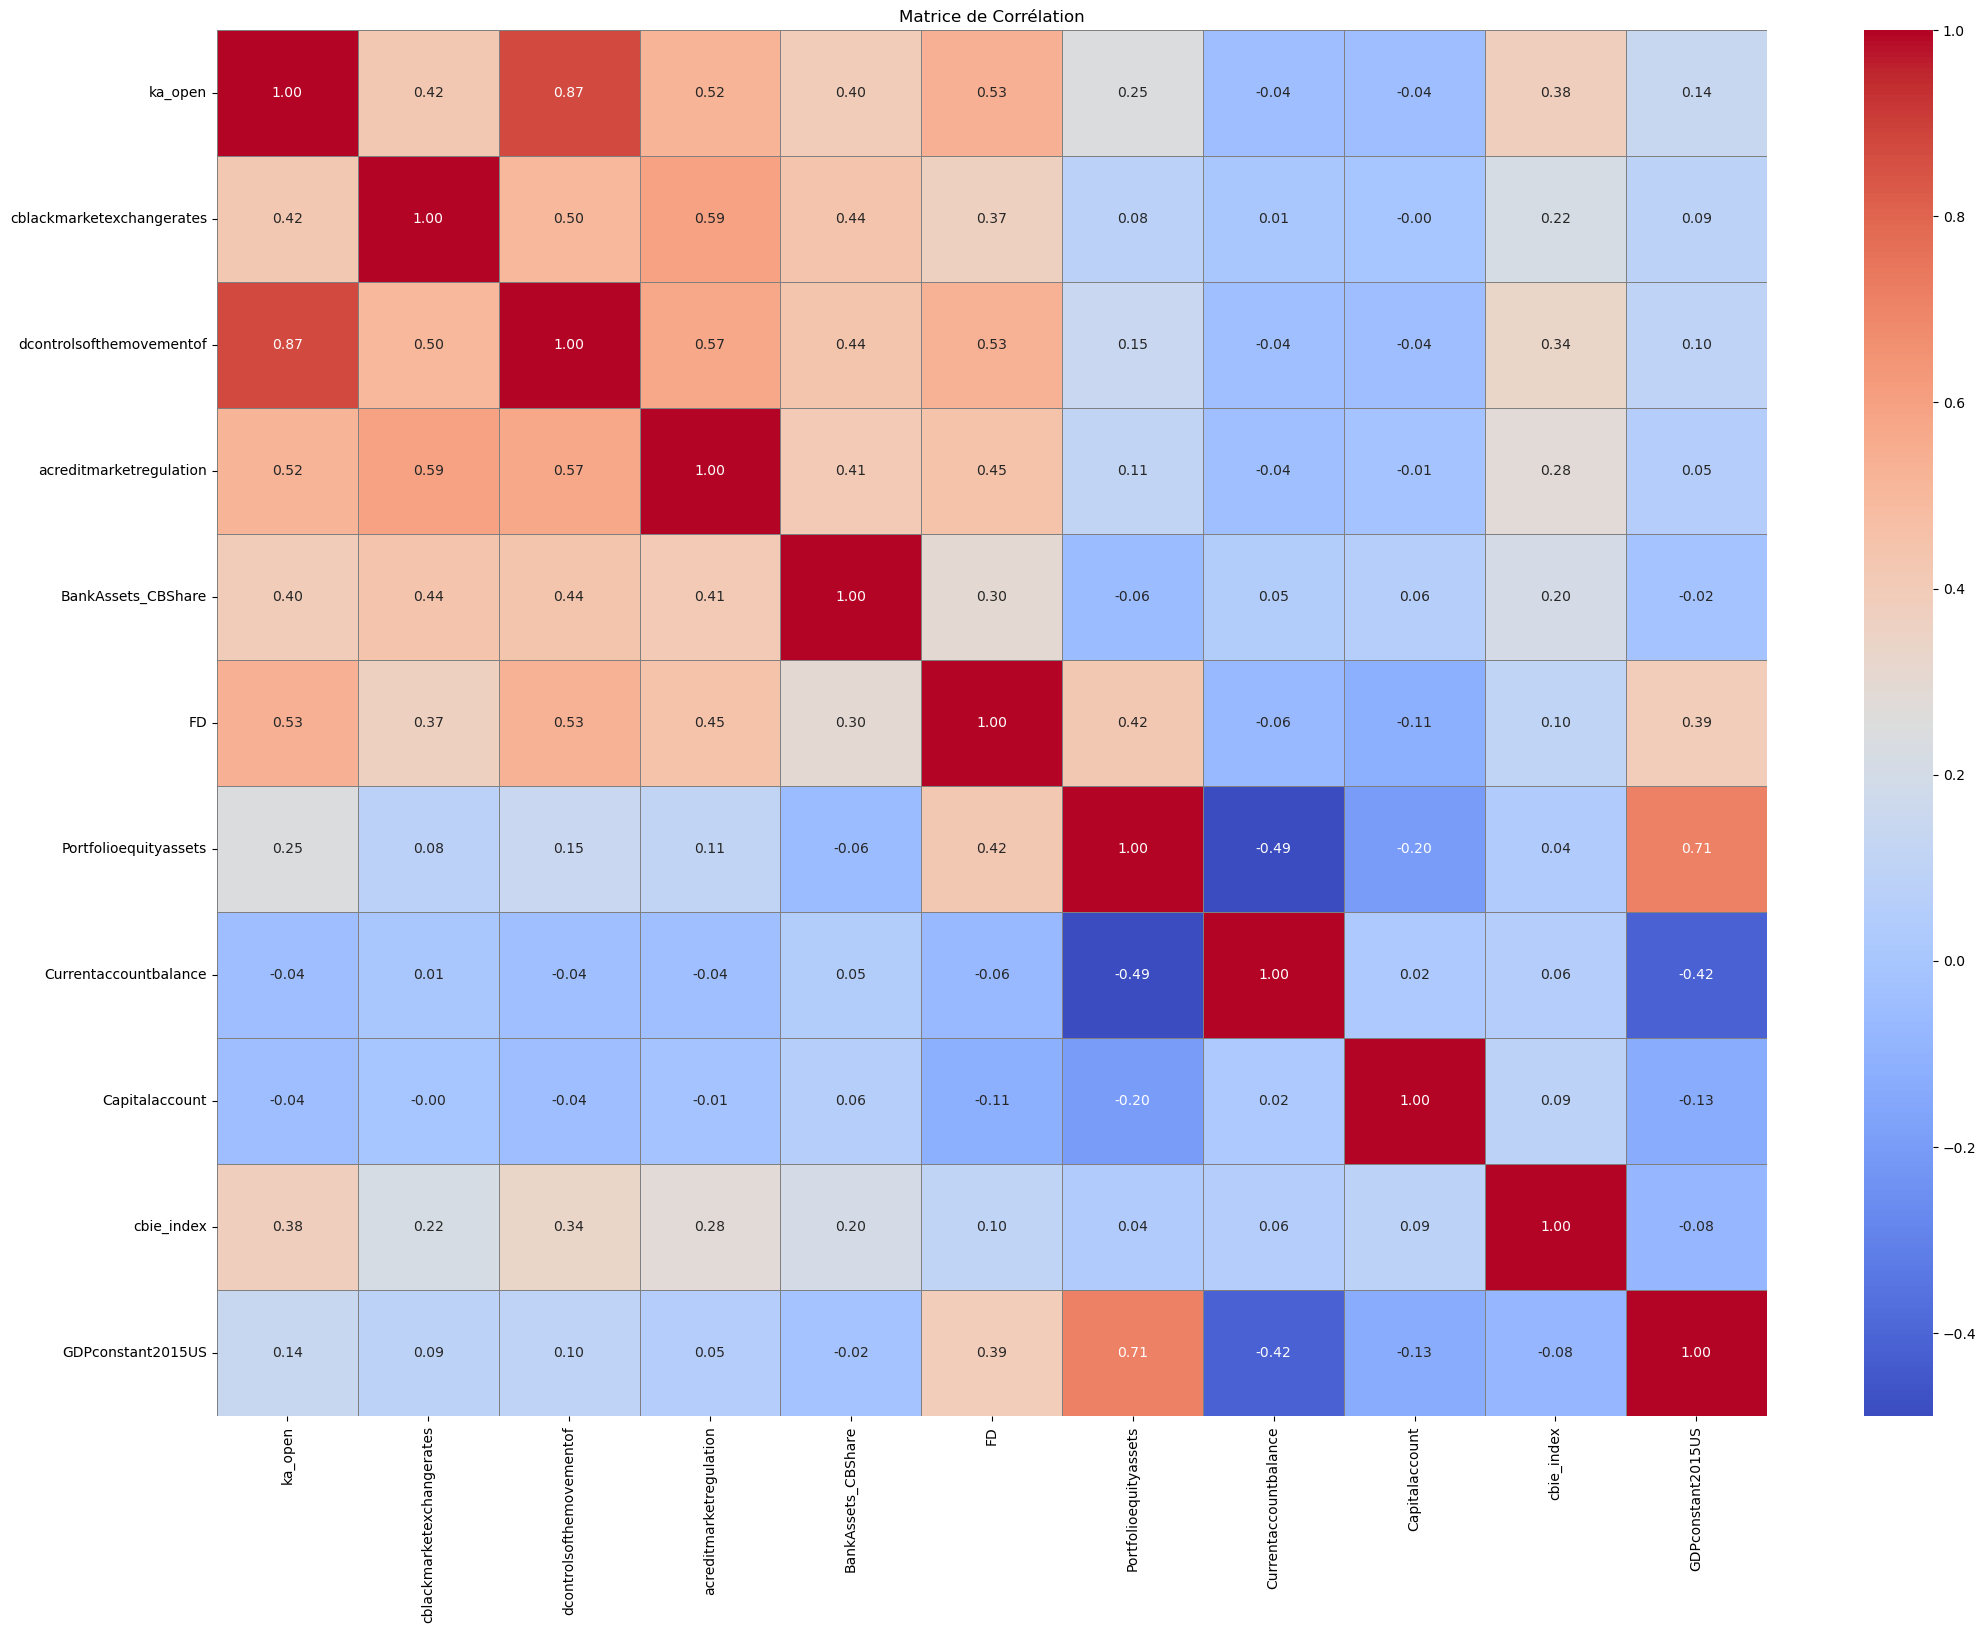

In [70]:
plot_corr(determinants_num_uncorr)

#### 'ka_open' et 'dcontrolsofthemovementof'

In [71]:
var_to_check = ['ka_open', 'dcontrolsofthemovementof']
for v in var_to_check:
  search_description(all_descriptions, v)

ka_open: The Chinn-Ito index (KAOPEN) is an index measuring a country's degree of capital account opennes. Between 0 and 1
dcontrolsofthemovementof: Summary index with (i) financial openness, (ii) capital controls, (iii) freedom of foreigners to visit, (iv) protection of foreign assets. Freedom for people and capital. 10 means full freedom. Summary index. Source: Fraser Institute 


In [72]:
calculate_vif(determinants_num_uncorr, var_to_check)

Variable        VIF
0                   ka_open  17.299901
1  dcontrolsofthemovementof  17.299901

In [73]:
run_comparative_ols(determinants_num_uncorr, target1, var_to_check)

OLS target1 ~ ['ka_open', 'dcontrolsofthemovementof']
                            OLS Regression Results                            
Dep. Variable:      GDPconstant2015US   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     21.13
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           8.46e-10
Time:                        18:30:30   Log-Likelihood:                -2533.2
No. Observations:                1800   AIC:                             5072.
Df Residuals:                    1797   BIC:                             5089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Ensemble, le modèle fait 0.3% mieux que seulement avec ka_open, ce qui est peu. De plus, la variable dcontrolsofthemovementof n'est significatif qu'au seuil de 5% alors que ka_open l'est au seuil de 1%.  
Il est préférable de simplifier le modèle en supprimant dcontrolsofthemovementof.

In [74]:
determinants_num_uncorr = drop_cols_from_dataframe(determinants_num_uncorr, ['dcontrolsofthemovementof'])

Index(['ka_open', 'cblackmarketexchangerates', 'acreditmarketregulation',
       'BankAssets_CBShare', 'FD', 'Portfolioequityassets',
       'Currentaccountbalance', 'Capitalaccount', 'cbie_index',
       'GDPconstant2015US'],
      dtype='object')


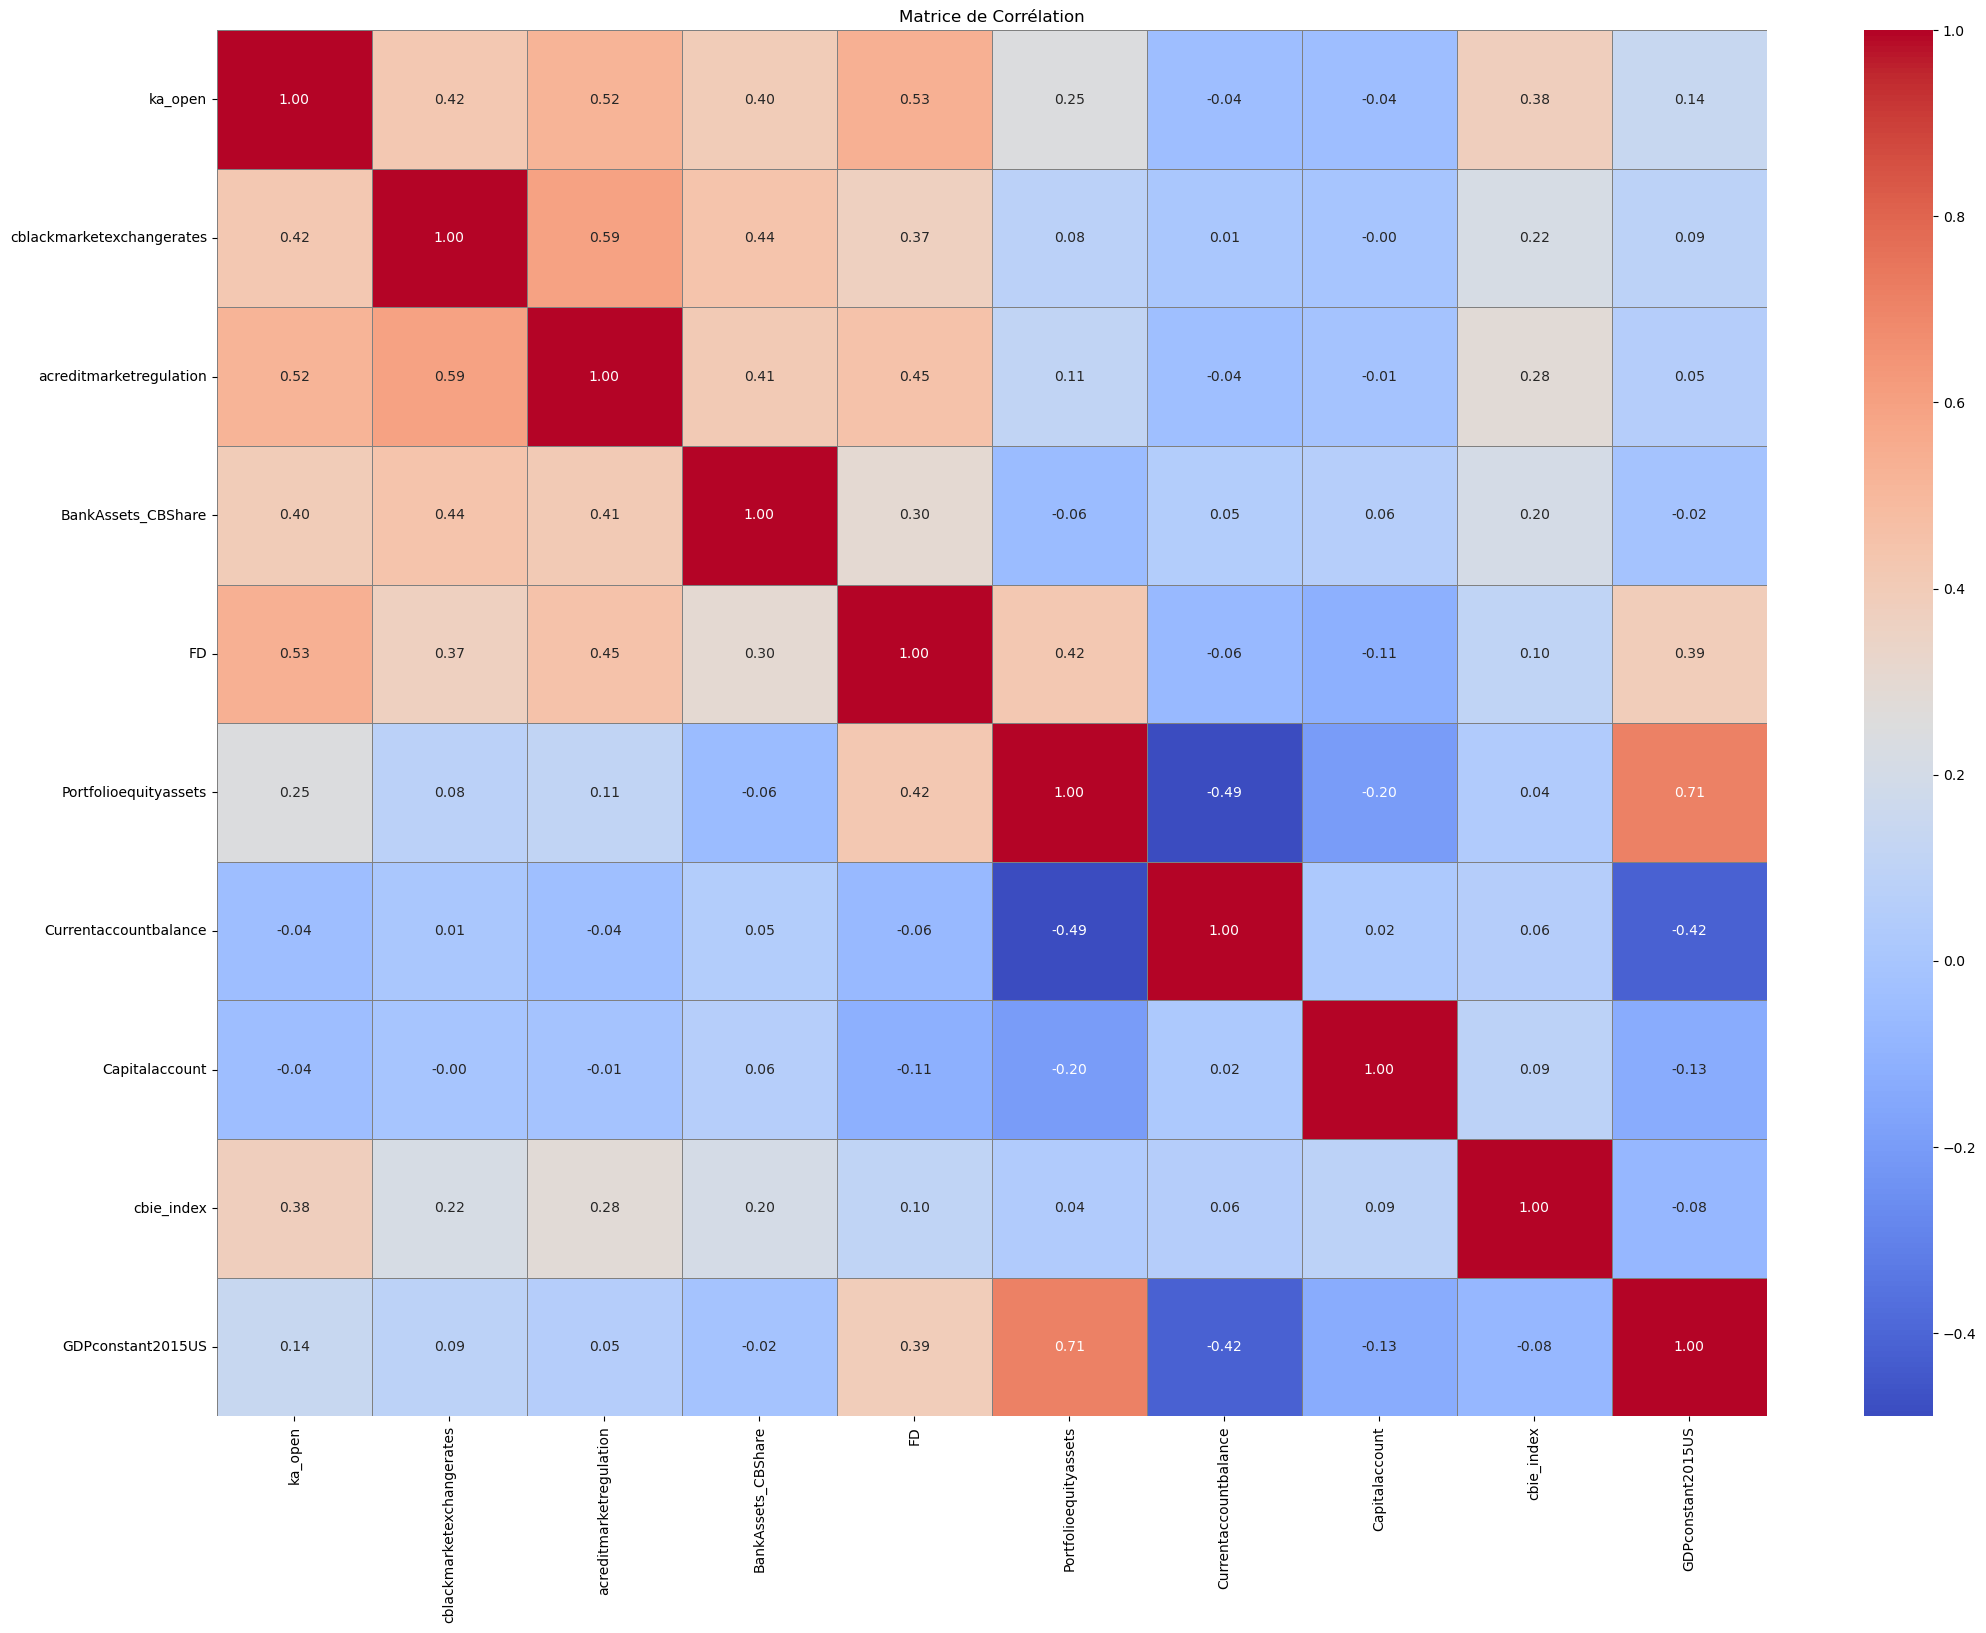

In [75]:
plot_corr(determinants_num_uncorr)

### Modèle obtenu

In [76]:
determinants_num_uncorr.columns

Index(['ka_open', 'cblackmarketexchangerates', 'acreditmarketregulation',
       'BankAssets_CBShare', 'FD', 'Portfolioequityassets',
       'Currentaccountbalance', 'Capitalaccount', 'cbie_index',
       'GDPconstant2015US'],
      dtype='object')

In [77]:
calculate_vif(determinants_num_uncorr)

Variable        VIF
0                    ka_open   7.465028
1  cblackmarketexchangerates  61.938687
2    acreditmarketregulation  43.217703
3         BankAssets_CBShare  54.901019
4                         FD  11.198154
5      Portfolioequityassets   1.928641
6      Currentaccountbalance   1.394669
7             Capitalaccount   1.064119
8                 cbie_index  14.353759

In [78]:
determinants_num_uncorr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 84 to 4030
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ka_open                    1800 non-null   float64
 1   cblackmarketexchangerates  1800 non-null   float64
 2   acreditmarketregulation    1800 non-null   float64
 3   BankAssets_CBShare         1800 non-null   float64
 4   FD                         1800 non-null   float64
 5   Portfolioequityassets      1800 non-null   float64
 6   Currentaccountbalance      1800 non-null   float64
 7   Capitalaccount             1800 non-null   float64
 8   cbie_index                 1800 non-null   float64
 9   GDPconstant2015US          1800 non-null   float64
dtypes: float64(10)
memory usage: 154.7 KB


In [79]:
numeric_columns = determinants_num_uncorr.columns.values

# Visualisation

## Plot time series

In [80]:
determinants_uncorr = determinants_num_uncorr.copy()
determinants_uncorr[['year', 'country']] = determinants[['year', 'country']]
determinants_uncorr.head()

ka_open  cblackmarketexchangerates  acreditmarketregulation  \
84  0.417237                       9.80                 4.446113   
85  0.417237                       8.24                 4.397397   
86  0.162948                       6.68                 4.348682   
87  0.162948                       5.12                 4.299967   
88  0.162948                       3.56                 4.251251   

    BankAssets_CBShare        FD  Portfolioequityassets  \
84               88.77  0.228351                   50.0   
85               85.50  0.230102                   52.0   
86               86.43  0.267035                   59.0   
87               68.78  0.217450                   75.0   
88               74.45  0.230107                   78.0   

    Currentaccountbalance  Capitalaccount  cbie_index  GDPconstant2015US  \
84                -4774.0             0.0      0.5175       2.878000e+11   
85                -4712.0             0.0      0.5175       2.729000e+11   
86                -2353.0             0.0      0.5175       2.709000e+11   
87                -2436.0             0.0      0.5175       2.827000e+11   
88                -2495.0             0.0      0.5175       2.871000e+11   

    year    country  
84  1980  Argentina  
85  1981  Argentina  
86  1982  Argentina  
87  1983  Argentina  
88  1984  Argentina

In [81]:
determinants_uncorr['country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria',
       'Brazil', 'Canada', 'Switzerland', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Algeria',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Greece', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iceland', 'Italy', 'Japan', 'Korea', 'Kuwait', 'Lithuania',
       'Luxembourg', 'Latvia', 'Morocco', 'Mexico', 'North Macedonia',
       'Malta', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Slovakia', 'Slovenia', 'Sweden', 'Thailand', 'Turkey',
       'United States', 'South Africa'], dtype=object)

In [82]:
tab1 = ['Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria',
       'Brazil', 'Canada', 'Switzerland', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Algeria',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Greece', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iceland', 'Italy', 'Japan', 'Korea', 'Kuwait', 'Lithuania',
       'Luxembourg', 'Latvia', 'Morocco', 'Mexico', 'North Macedonia',
       'Malta', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Slovakia', 'Slovenia', 'Sweden', 'Thailand', 'Turkey',
       'United States', 'South Africa']

tab2 = ['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile','China',
 'Colombia', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
 'Portugal', 'Russia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
 'Türkiye', 'United Kingdom', 'United States']

# Intersection
common = list(set(tab1) & set(tab2))
print(common)

# Diff
diff = set(tab1).symmetric_difference(set(tab2))
print(diff)

['France', 'Russia', 'Austria', 'Switzerland', 'Portugal', 'Luxembourg', 'Netherlands', 'Indonesia', 'Japan', 'Ireland', 'Norway', 'New Zealand', 'Colombia', 'Belgium', 'Finland', 'United Kingdom', 'Mexico', 'Greece', 'Sweden', 'United States', 'Poland', 'Canada', 'Hungary', 'India', 'South Africa', 'China', 'Denmark', 'Italy', 'Germany', 'Czechia', 'Brazil', 'Chile', 'Spain', 'Korea', 'Australia']
{'Thailand', 'Slovakia', 'Iceland', 'Lithuania', 'Türkiye', 'Israel', 'Philippines', 'Morocco', 'Argentina', 'Cyprus', 'Kuwait', 'Latvia', 'Turkey', 'Peru', 'Slovenia', 'Bulgaria', 'North Macedonia', 'Costa Rica', 'Malaysia', 'Romania', 'Estonia', 'Malta', 'Algeria', 'Croatia'}


c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per_category[var] = scaler.fit_transform(df_per_category[[var]])
c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per_category[var] = scaler.fit_transform(df_per_category[[var]])
c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:63: SettingWithCopyWarning: 
A value

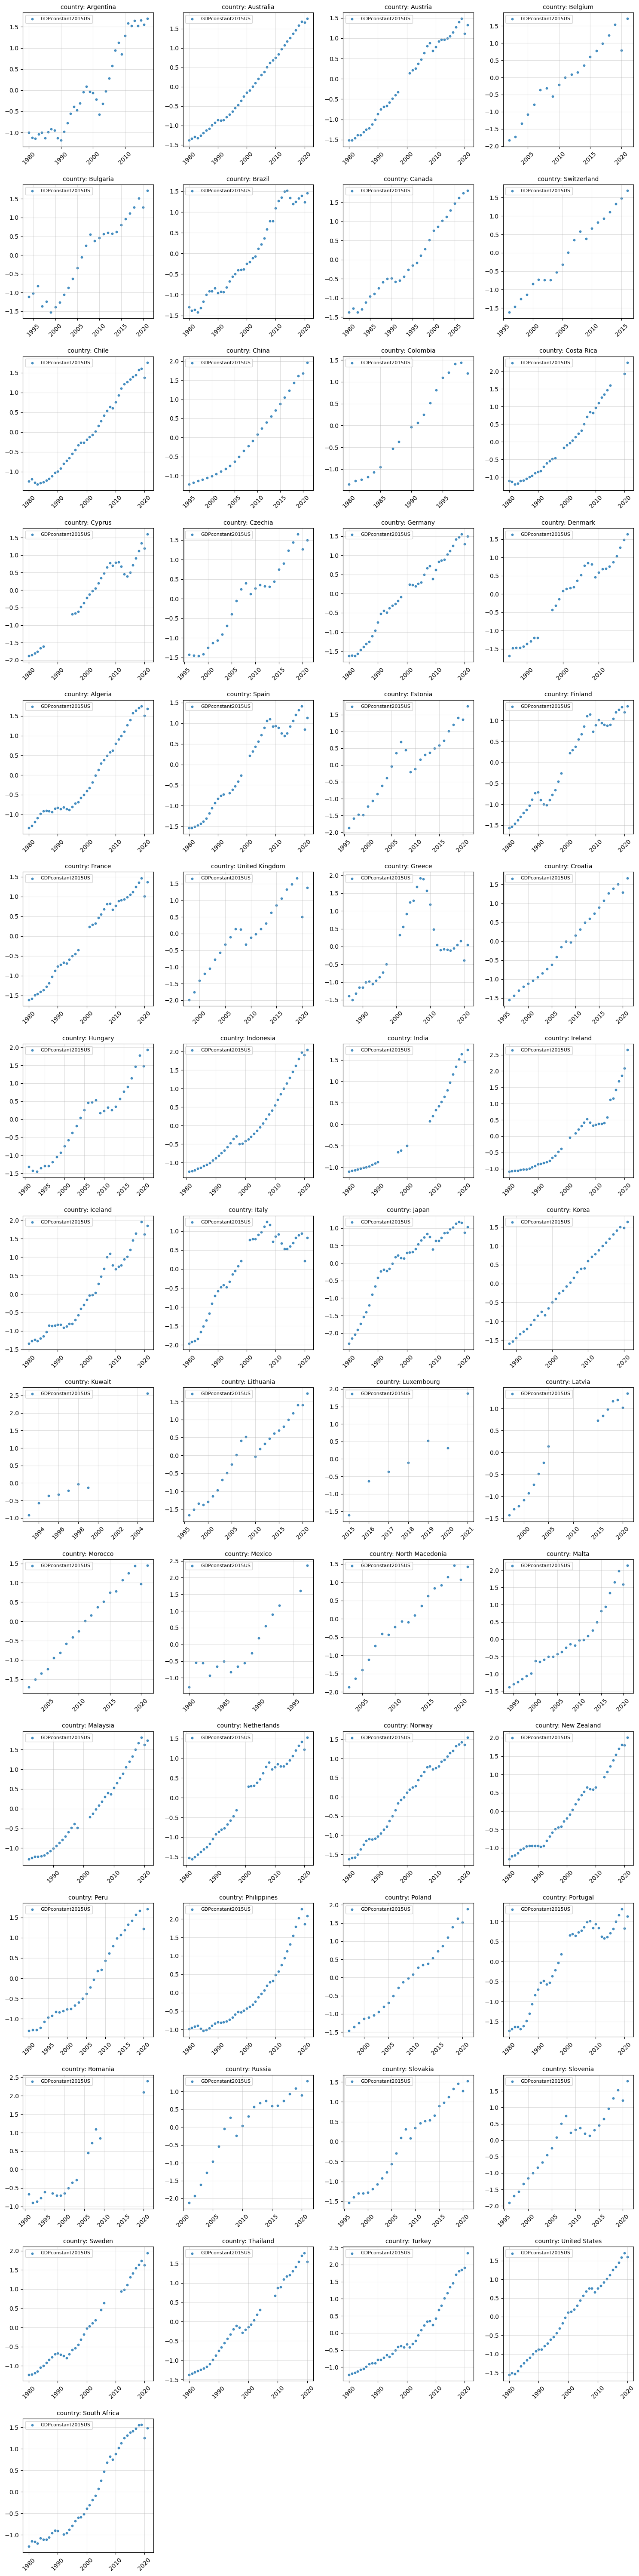

In [83]:
plot_time_series(determinants_uncorr, 'country', determinants_uncorr['country'].unique(), ['GDPconstant2015US'], col_date='year', scaled=True)

Nous allons essayer d'interpoler les valeurs manquantes pour les différents pays et les différentes variables explicatives.  
En revanche, certains pays ont un **trop grand écart** entre 2 points dans le time series (exemple en haut pour un seul indicateur).  
Interpoler ce genre de gap est trop risqué, nous avons beaucoup plus de chance d'introduire des biais.  
  
Il vaux donc mieux de supprimer ces pays.

In [84]:
countries_to_remove = ['Kuwait', 'Luxembourg', 'Latvia', 'Romania']
determinants_uncorr = determinants_uncorr[~determinants_uncorr['country'].isin(countries_to_remove)]

c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per_category[var] = scaler.fit_transform(df_per_category[[var]])
c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per_category[var] = scaler.fit_transform(df_per_category[[var]])
c:\Users\lngeth\OneDrive\Bureau\Laurent Cours\3A\advanced econometrics\tools.py:63: SettingWithCopyWarning: 
A value

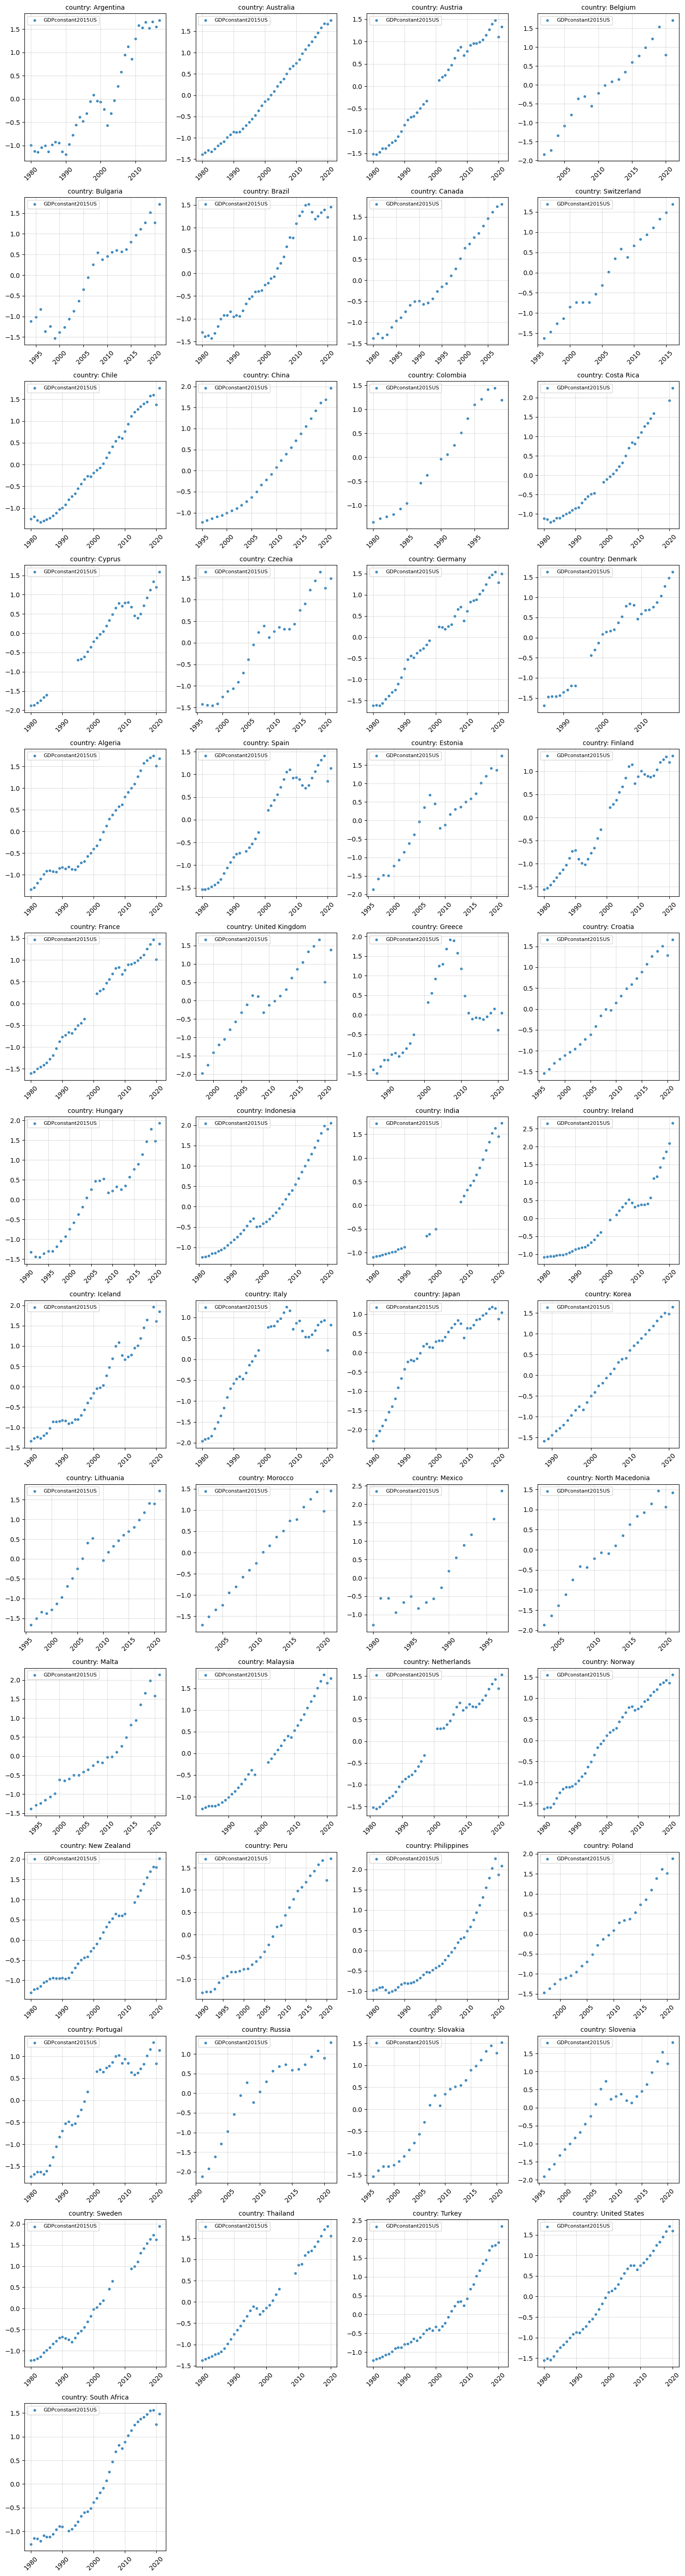

In [85]:
plot_time_series(determinants_uncorr, 'country', determinants_uncorr['country'].unique(), [target1], col_date='year', scaled=True)

## Interpolation des valeurs manquantes

In [86]:
determinants_uncorr_interpolated = impute_nan_values_time_series(determinants_uncorr)
determinants_uncorr_interpolated.head()

year    country   ka_open  cblackmarketexchangerates  \
0  1980  Argentina  0.417237                       9.80   
1  1981  Argentina  0.417237                       8.24   
2  1982  Argentina  0.162948                       6.68   
3  1983  Argentina  0.162948                       5.12   
4  1984  Argentina  0.162948                       3.56   

   acreditmarketregulation  BankAssets_CBShare        FD  \
0                 4.446113               88.77  0.228351   
1                 4.397397               85.50  0.230102   
2                 4.348682               86.43  0.267035   
3                 4.299967               68.78  0.217450   
4                 4.251251               74.45  0.230107   

   Portfolioequityassets  Currentaccountbalance  Capitalaccount  cbie_index  \
0                   50.0                -4774.0             0.0      0.5175   
1                   52.0                -4712.0             0.0      0.5175   
2                   59.0                -2353.0             0.0      0.5175   
3                   75.0                -2436.0             0.0      0.5175   
4                   78.0                -2495.0             0.0      0.5175   

   GDPconstant2015US  
0       2.878000e+11  
1       2.729000e+11  
2       2.709000e+11  
3       2.827000e+11  
4       2.871000e+11

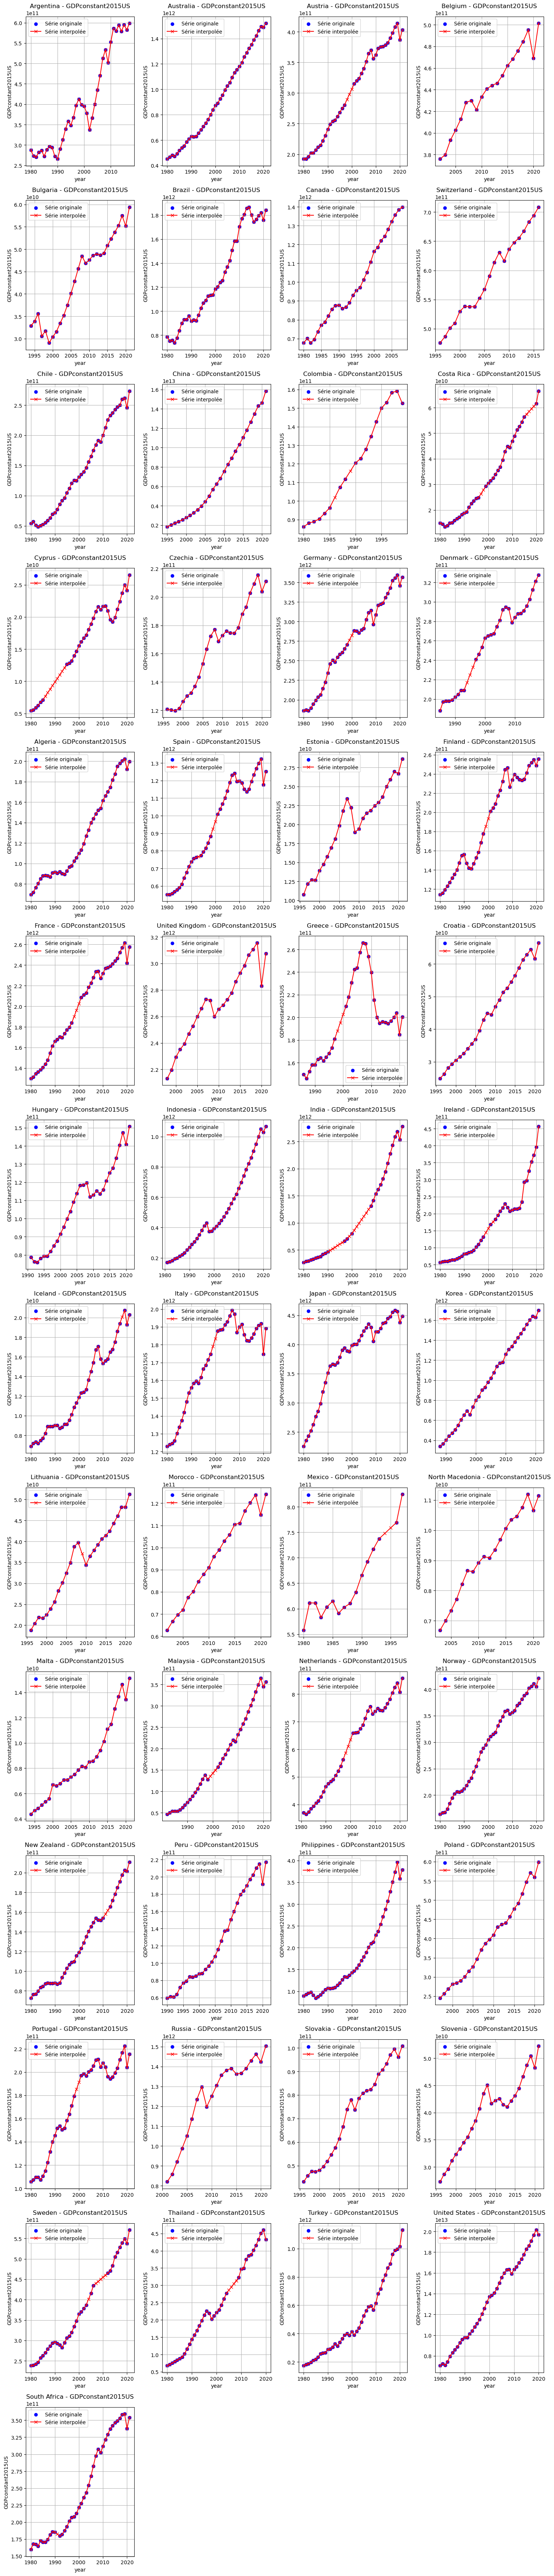

In [87]:
plot_diff_time_series_interpolated(determinants_uncorr, determinants_uncorr_interpolated)

In [88]:
print(determinants_uncorr_interpolated['country'].unique())
print(len(determinants_uncorr_interpolated['country'].unique()))

['Argentina' 'Australia' 'Austria' 'Belgium' 'Bulgaria' 'Brazil' 'Canada'
 'Switzerland' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Algeria' 'Spain' 'Estonia' 'Finland' 'France'
 'United Kingdom' 'Greece' 'Croatia' 'Hungary' 'Indonesia' 'India'
 'Ireland' 'Iceland' 'Italy' 'Japan' 'Korea' 'Lithuania' 'Morocco'
 'Mexico' 'North Macedonia' 'Malta' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Russia'
 'Slovakia' 'Slovenia' 'Sweden' 'Thailand' 'Turkey' 'United States'
 'South Africa']
53


In [89]:
determinants_uncorr_interpolated.info()
print(f"Nb d'observations : {len(determinants_uncorr_interpolated)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1831 non-null   int64  
 1   country                    1831 non-null   object 
 2   ka_open                    1831 non-null   float64
 3   cblackmarketexchangerates  1831 non-null   float64
 4   acreditmarketregulation    1831 non-null   float64
 5   BankAssets_CBShare         1831 non-null   float64
 6   FD                         1831 non-null   float64
 7   Portfolioequityassets      1831 non-null   float64
 8   Currentaccountbalance      1831 non-null   float64
 9   Capitalaccount             1831 non-null   float64
 10  cbie_index                 1831 non-null   float64
 11  GDPconstant2015US          1831 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 171.8+ KB
Nb d'observations : 1831


Nous avons interpoler les résultats et il nous reste 1831 observations et 53 pays.

In [90]:
determinants_uncorr_interpolated.to_csv('./data/determinants_processed.csv', index=False)